In [1601]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

In [1602]:
#importing data
#since index will act as Day count, we will start index from 1
df = pd.read_csv("WHO-COVID-19-global-data.csv")
df.index+=1
df

,Date_reported,Country,Cumulative_cases
1,1/3/2020,Afghanistan,0
2,1/4/2020,Afghanistan,0
3,1/5/2020,Afghanistan,0
4,1/6/2020,Afghanistan,0
5,1/7/2020,Afghanistan,0
...,...,...,...
148595,9/16/2021,Zimbabwe,127083
148596,9/17/2021,Zimbabwe,127368
148597,9/18/2021,Zimbabwe,127632
148598,9/19/2021,Zimbabwe,127739


In [1603]:
tur = df[df['Country'] == 'Turkey']
tur=tur.reset_index()
tur.index +=1

In [1604]:
tur_start =tur[tur['Date_reported']=='2020-03-18']
tur_start

,index,Date_reported,Country,Cumulative_cases


### Turkey Original Wave 1 : 70- 207
### After considering start as 50 cases:
### Turkey Wave 1 : 76 - 207
### Split as:
### 76-104
### 105-207

In [1605]:
tur_new = tur[75:626]

tur_new = tur_new.reset_index()
tur_new.index +=1
tur_new

,level_0,index,Date_reported,Country,Cumulative_cases
1,76,136762,3/18/2020,Turkey,98
2,77,136763,3/19/2020,Turkey,191
3,78,136764,3/20/2020,Turkey,359
4,79,136765,3/21/2020,Turkey,670
5,80,136766,3/22/2020,Turkey,947
...,...,...,...,...,...
547,622,137308,9/15/2021,Turkey,6710666
548,623,137309,9/16/2021,Turkey,6738890
549,624,137310,9/17/2021,Turkey,6767008
550,625,137311,9/18/2021,Turkey,6794700


In [1606]:
tur_pop = 84340000
tur_norm_case = tur_new['Cumulative_cases']/tur_pop

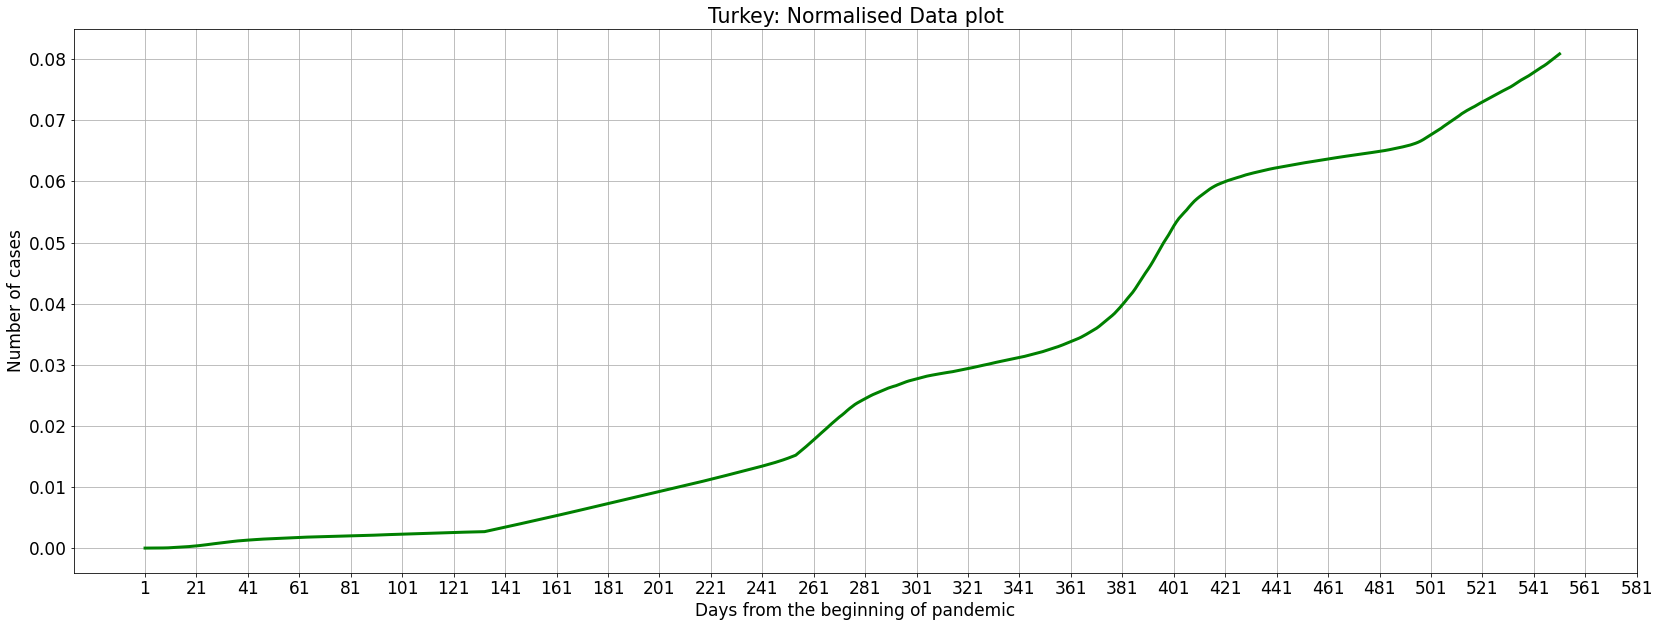

In [1607]:
x1 = tur_new.index
y1 = tur_norm_case

plt.plot(x1,y1,color="green",linewidth =3.0)
plt.xticks(np.arange(1,600,20))
#plt.yticks(np.arange(-14,0,0.5))
plt.xlabel('Days from the beginning of pandemic')
plt.ylabel('Number of cases')
plt.title('Turkey: Normalised Data plot')


plt.rcParams['figure.figsize'] = [30,15]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

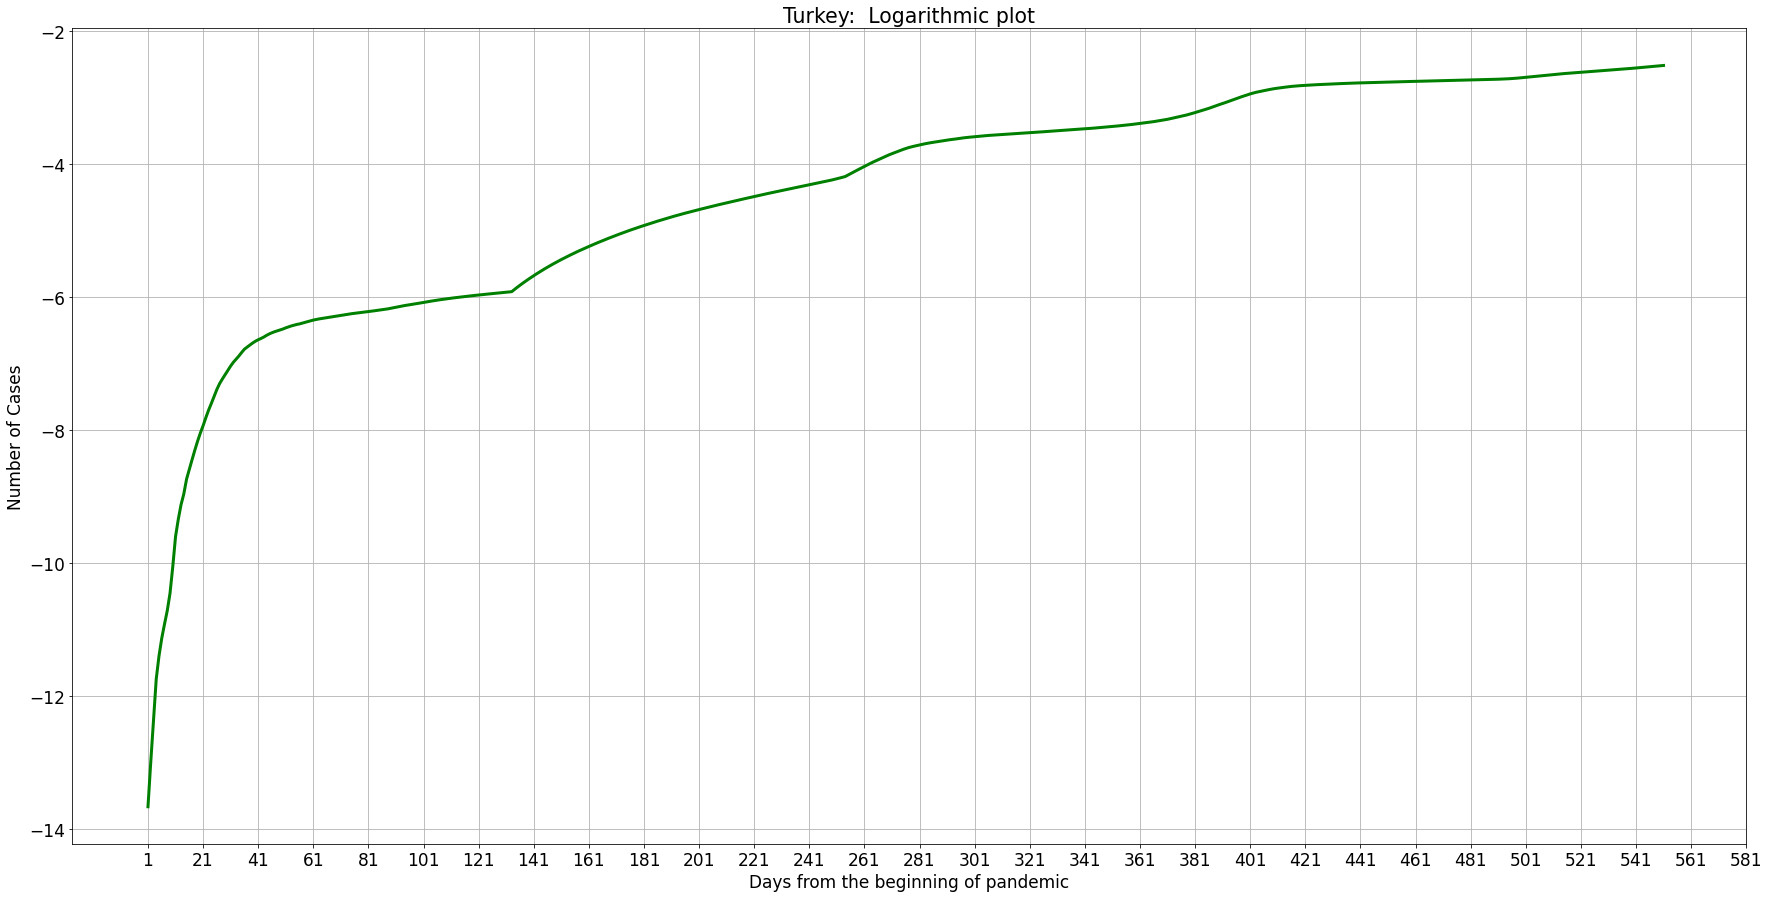

In [1608]:
x1 = tur_new.index
y_log_norm = np.log(tur_norm_case)

plt.plot(x1,y_log_norm,color="green",linewidth =3.0)
plt.xticks(np.arange(1,600,20))
plt.yticks(np.arange(-14,0,2))
plt.xlabel('Days from the beginning of pandemic')
plt.ylabel('Number of Cases')
plt.title('Turkey:  Logarithmic plot')


plt.rcParams['figure.figsize'] = [30,15]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

In [1609]:
#10 days before start or epidemic would be 48th day in original data

day_10 = tur['Cumulative_cases'][66]
R0 = day_10 / tur_pop
print(R0)
I0 = tur['Cumulative_cases'][1] - R0
print(I0)
S0 = 1- I0 - R0
print(S0)

0.0
0.0
1.0


### Interval 1 : 1 - 29
### Interval 2 : 29 - 132
### Interval 3 : 1 - 132
### Interval 4: 1 - 551

In [1610]:
x = tur_new.index.values
y= np.log(tur_norm_case)
x_int1 = x[:29]
y_int1 = y[:29]
x_int2 = x[29:132]
y_int2 = y[29:132]
x_int3 = x[:132]
y_int3 = y[:132]
x_int4 = x[:551]
y_int4 = y[:551]


curve1 = np.polyfit(x_int1,y_int1,1)
r1= curve1[0]
c1= curve1[1]
print(r1,c1)


curve2 = np.polyfit(x_int2,y_int2,1)
r2= curve2[0]
c2= curve2[1]
print(r2,c2)

curve3 = np.polyfit(x_int3,y_int3,1)
r3= curve3[0]
c3= curve3[1]
print(r3,c3)

curve4 = np.polyfit(x_int4,y_int4,1)
r4= curve4[0]
c4= curve4[1]
print(r4,c4)

print(x)

0.2105025774435757 -12.480853468315196
0.008772027114461182 -6.976601031911351
0.030221445475714318 -8.947461074620643
0.010196815612099586 -7.227342429045574
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 2

In [1611]:
y1 = r1*x_int1 +c1
y2 = r2*x_int2 +c2
y3 = r3*x_int3 +c3
y4 = r4*x_int4 +c4

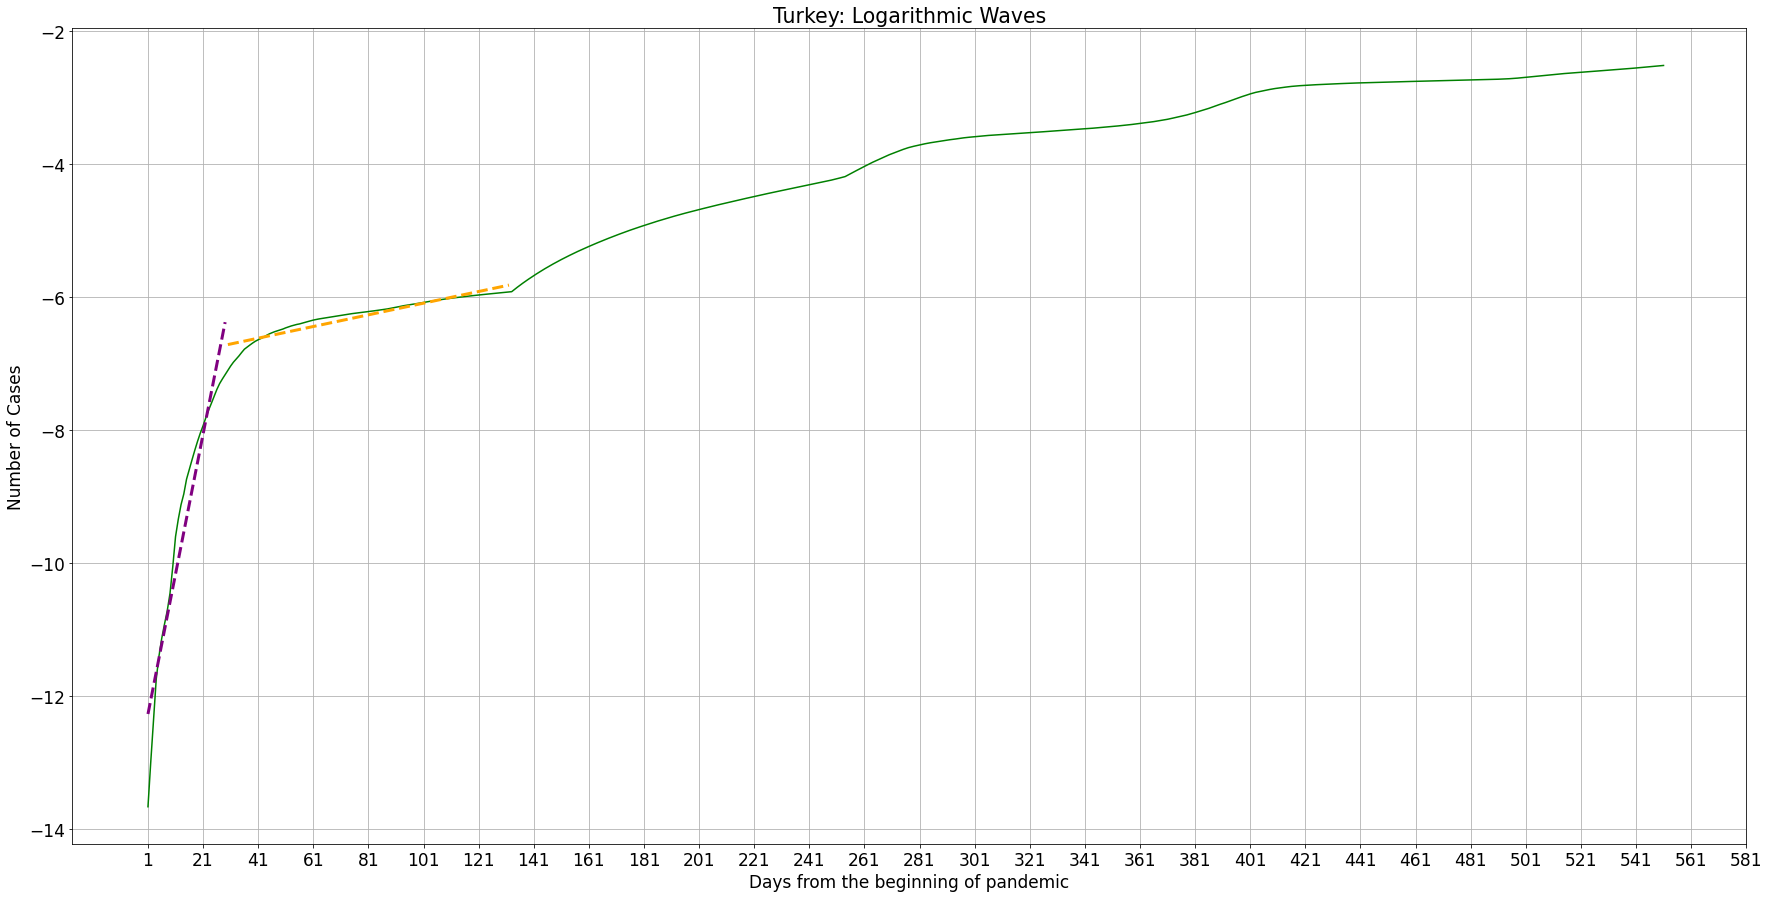

In [1612]:
plt.plot(x,y,color="green")
plt.plot(x_int1,y1,color="purple",linestyle="dashed",linewidth=3.0)
plt.plot(x_int2,y2,color="orange",linestyle="dashed",linewidth=3.0)

#plt.xaxis.set_ticks(np.arange(0,625,13))
#plt.yaxis.set_ticks
plt.xticks(np.arange(1,600,20))
#plt.yticks(np.arange(-19,1,1))
plt.title('Turkey: Logarithmic Waves')
plt.xlabel('Days from the beginning of pandemic')
plt.ylabel('Number of Cases')
plt.rcParams['figure.figsize'] = [28,10]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

In [1613]:

b=0.1
a1= r1+b
print(a1)

a2= r2+b
print(a2)

a3= r3+b
print(a3)

a4= r4+b
print(a4)

0.3105025774435757
0.10877202711446118
0.13022144547571432
0.1101968156120996


In [1614]:
from scipy.special import expit

obv_y = tur_norm_case[:29]
print(obv_y)

linreg = c1 + r1 * x_int1
expit(linreg)
exp_y = np.exp(linreg)
print(exp_y)

1     0.000001
2     0.000002
3     0.000004
4     0.000008
5     0.000011
6     0.000015
7     0.000018
8     0.000022
9     0.000029
10    0.000043
11    0.000068
12    0.000088
13    0.000109
14    0.000128
15    0.000160
16    0.000186
17    0.000215
18    0.000248
19    0.000284
20    0.000321
21    0.000358
22    0.000404
23    0.000453
24    0.000501
25    0.000558
26    0.000619
27    0.000675
28    0.000724
29    0.000772
Name: Cumulative_cases, dtype: float64
[4.68872020e-06 5.78727907e-06 7.14322834e-06 8.81687412e-06
 1.08826522e-05 1.34324384e-05 1.65796349e-05 2.04642141e-05
 2.52589434e-05 3.11770692e-05 3.84818015e-05 4.74980197e-05
 5.86267218e-05 7.23628592e-05 8.93173494e-05 1.10244247e-04
 1.36074279e-04 1.67956242e-04 2.07308093e-04 2.55880014e-04
 3.15832249e-04 3.89831188e-04 4.81167947e-04 5.93904747e-04
 7.33055581e-04 9.04809209e-04 1.11680441e-03 1.37846971e-03
 1.70144273e-03]


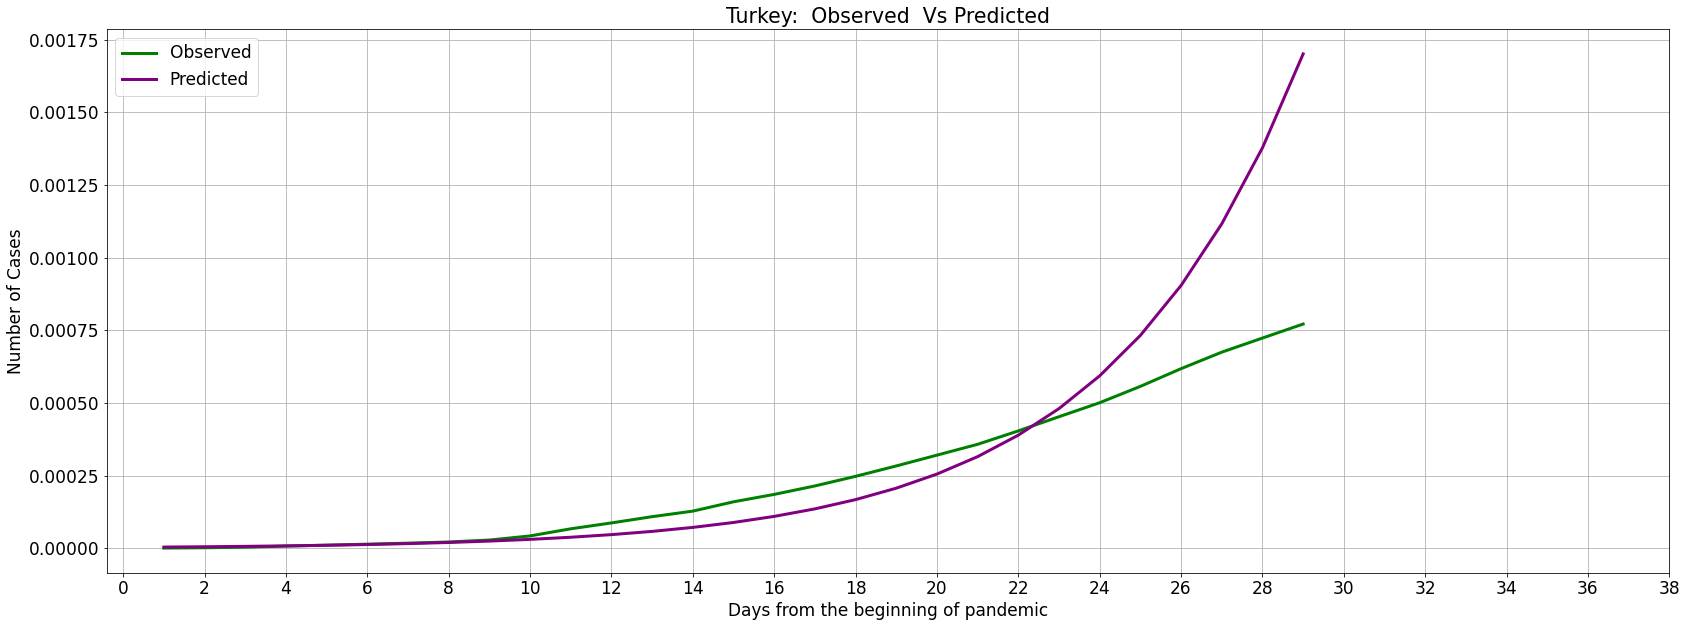

In [1615]:
plt.plot(x_int1,obv_y,color="green",linewidth=3.0, label = 'Observed')
plt.plot(x_int1,exp_y,color="purple",linewidth=3.0, label = 'Predicted')

#plt.xaxis.set_ticks(np.arange(0,625,13))
#plt.yaxis.set_ticks
plt.xticks(np.arange(0,40,2))
#plt.yticks(np.arange(0,0.005,0.0005))
plt.title('Turkey:  Observed  Vs Predicted')
plt.xlabel('Days from the beginning of pandemic')
plt.ylabel('Number of Cases')
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.legend(loc="upper left")
plt.grid()
plt.show()

Interval 1: 1-29

In [1616]:

day_10 = tur['Cumulative_cases'][66]
R0 = day_10 / tur_pop
print(R0)
I0 = tur_new['Cumulative_cases'][1]/tur_pop - R0
print(I0)
S0 = 1- I0 - R0
print(S0)
Sign = S0
print(Sign)
Sres = 0
Sexh = 1 - (Sign + Sres + I0 + R0)


0.0
1.1619634811477353e-06
0.9999988380365189
0.9999988380365189


In [1617]:
print(x_int1)
k2 = 1
k3 = 1/50
k6 = 1/100

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]


In [1618]:
def equations(t, y,a,b,k2,k3,k6):
# y(0) = S_ign(t)
# y(1) = S_res(t)
# y(2) = Sexh(t)
# y(3) = I(t)
# y(4) = R(t)

#S_exh = 1 - sum(y);

    
    #Sexh = 1 -y[0]-y[1] - y[3] - y[4]
        
    dSigndt = -a * y[0] * y[3] - k2 * y[0] * y[3] + k6 * y[2]
    dSresdt = k2 * y[0] * y[3] - k3 * y[1]
    dSexhdt = k3 * y[1] - a * y[2] * y[3] -k6 * y[2]
    
    dIdt = a * y[0] * y[3] + a * y[2] * y[3] - b * y[3]
    dRdt = b * y[3]
    
    return [dSigndt, dSresdt,dSexhdt, dIdt, dRdt]
    
inp = tur_norm_case[:29]

In [1619]:
from scipy.integrate import solve_ivp
sol = solve_ivp(equations, [1, inp.shape[0]], [Sign, Sres,Sexh, I0, R0],args = (a1,b,k2,k3,k6), t_eval=x_int1)
#print(sol.y)

In [1620]:
p1 = sol.y[3] + sol.y[4]

MSE = np.mean(np.square(p1 - inp))

print(a1,MSE)
print(p1)
#print(tur_norm_case[:29])

0.3105025774435757 3.064557298372186e-08
[1.16196348e-06 1.56360145e-06 2.05927944e-06 2.67084781e-06
 3.42597825e-06 4.35841692e-06 5.60439987e-06 7.19122952e-06
 9.06032512e-06 1.12100112e-05 1.36955174e-05 1.66289788e-05
 2.01794356e-05 2.45728333e-05 3.00920227e-05 3.70767597e-05
 4.59237057e-05 5.70864270e-05 7.10753955e-05 8.84579882e-05
 1.09858487e-04 1.35958842e-04 1.67954473e-04 2.07357761e-04
 2.55869713e-04 3.15728325e-04 3.89708583e-04 4.81122461e-04
 5.93818925e-04]


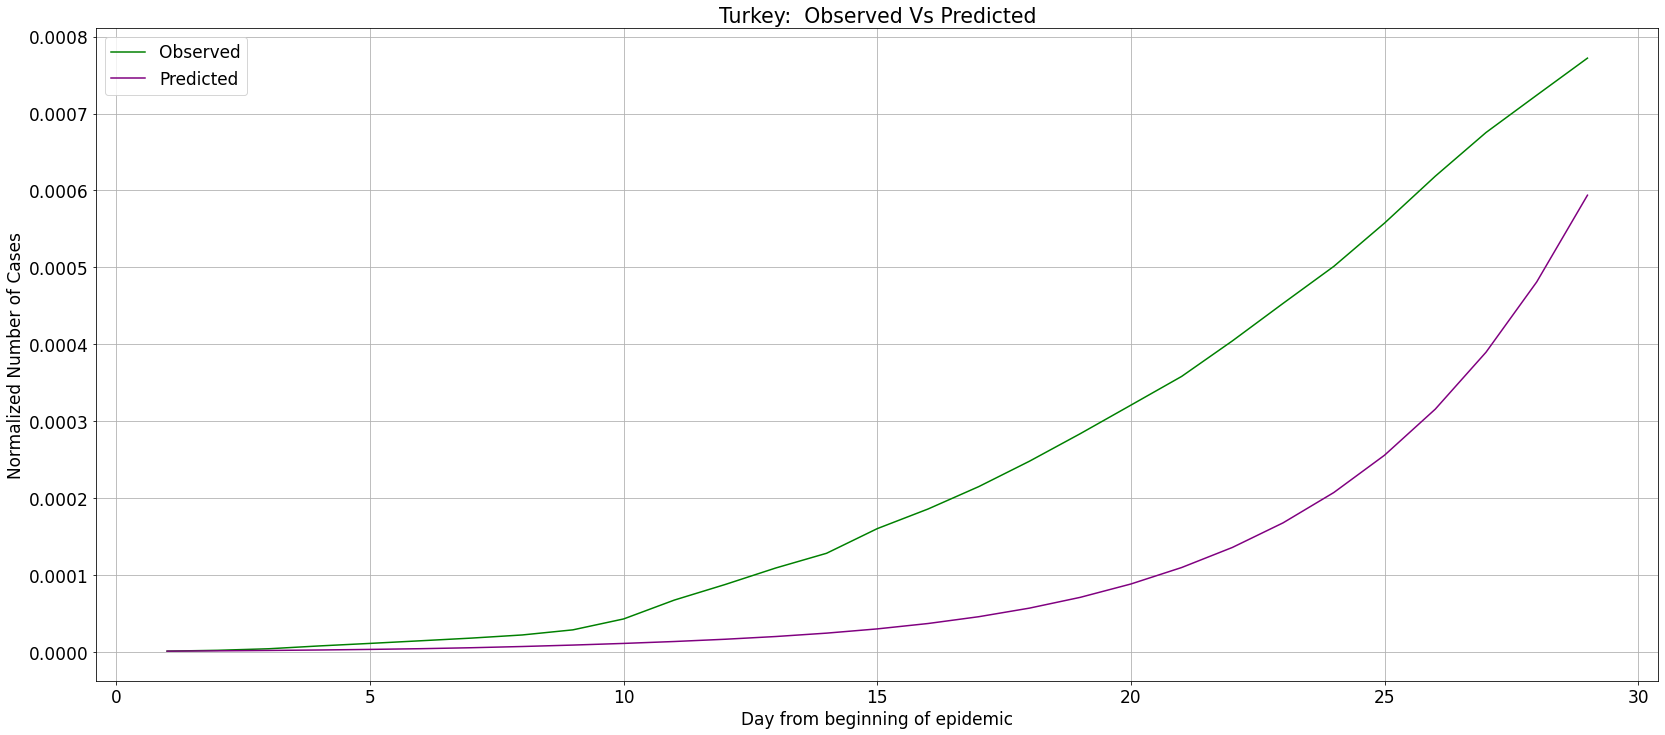

In [1621]:
plt.figure()
plt.plot(x_int1, tur_norm_case[:29], color="green", label = 'Observed')
plt.plot(x_int1, p1, color="purple", label = 'Predicted')
#plt.xticks(np.arange(0,35,2))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Normalized Number of Cases')
plt.title('Turkey:  Observed Vs Predicted')
plt.rcParams['figure.figsize'] = [28,10]
plt.rcParams.update({'font.size': 17})
plt.legend(loc="upper left")
plt.grid()
plt.show()


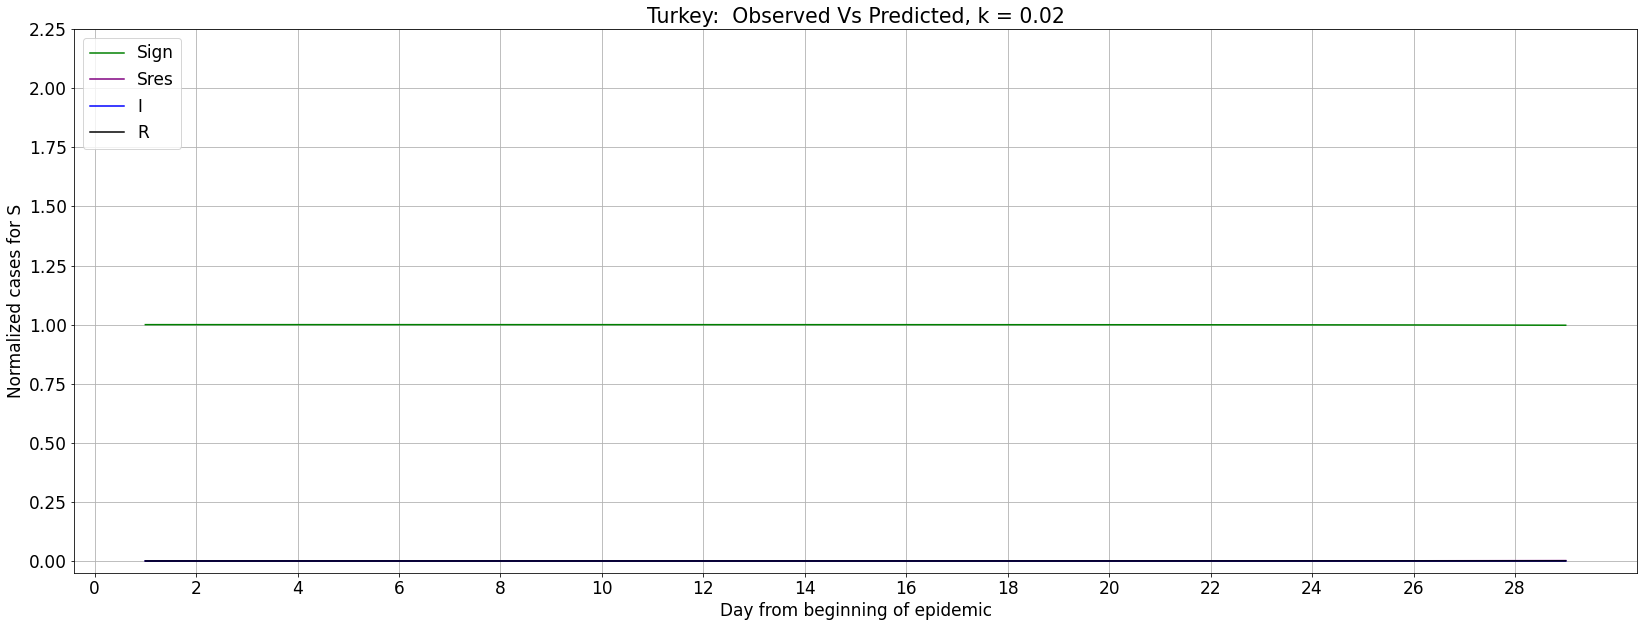

In [1622]:
plt.figure()
plt.plot(x_int1,sol.y[0],color="green", label = 'Sign')
plt.plot(x_int1,sol.y[1], color="purple",label = 'Sres')
plt.plot(x_int1,sol.y[2], color="blue",label = 'I')
plt.plot(x_int1,sol.y[3], color="black",label = 'R')
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Normalized cases for S')
plt.xticks(np.arange(0,29,2))
plt.yticks(np.arange(0,2.5,0.25))
plt.title('Turkey:  Observed Vs Predicted, k = 0.02')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.legend(loc="upper left")
plt.grid()
plt.show()

Modified Model

In [1623]:
k2 = 0.05
sol = solve_ivp(equations, [1, inp.shape[0]], [Sign, Sres,Sexh, I0, R0],args = (a1,b,k2,k3,k6), t_eval=x_int1)

In [1624]:
pm1 = sol.y[3] + sol.y[4]

MSE = np.mean(np.square(pm1 - inp))

print(a1,MSE)
print(pm1)

0.3105025774435757 3.749857237232795e-08
[1.16196348e-06 1.56363638e-06 2.05954191e-06 2.67068697e-06
 3.42473910e-06 4.35650785e-06 5.50794478e-06 7.01883536e-06
 9.79692395e-06 1.35783627e-05 1.78759071e-05 2.23534133e-05
 2.68258382e-05 3.12592397e-05 3.57707764e-05 4.06287077e-05
 4.62523937e-05 5.32122955e-05 6.22299748e-05 7.41780944e-05
 9.00804175e-05 1.11111808e-04 1.38598232e-04 1.74016755e-04
 2.18995542e-04 2.75313862e-04 3.44902084e-04 4.29841675e-04
 5.32365206e-04]


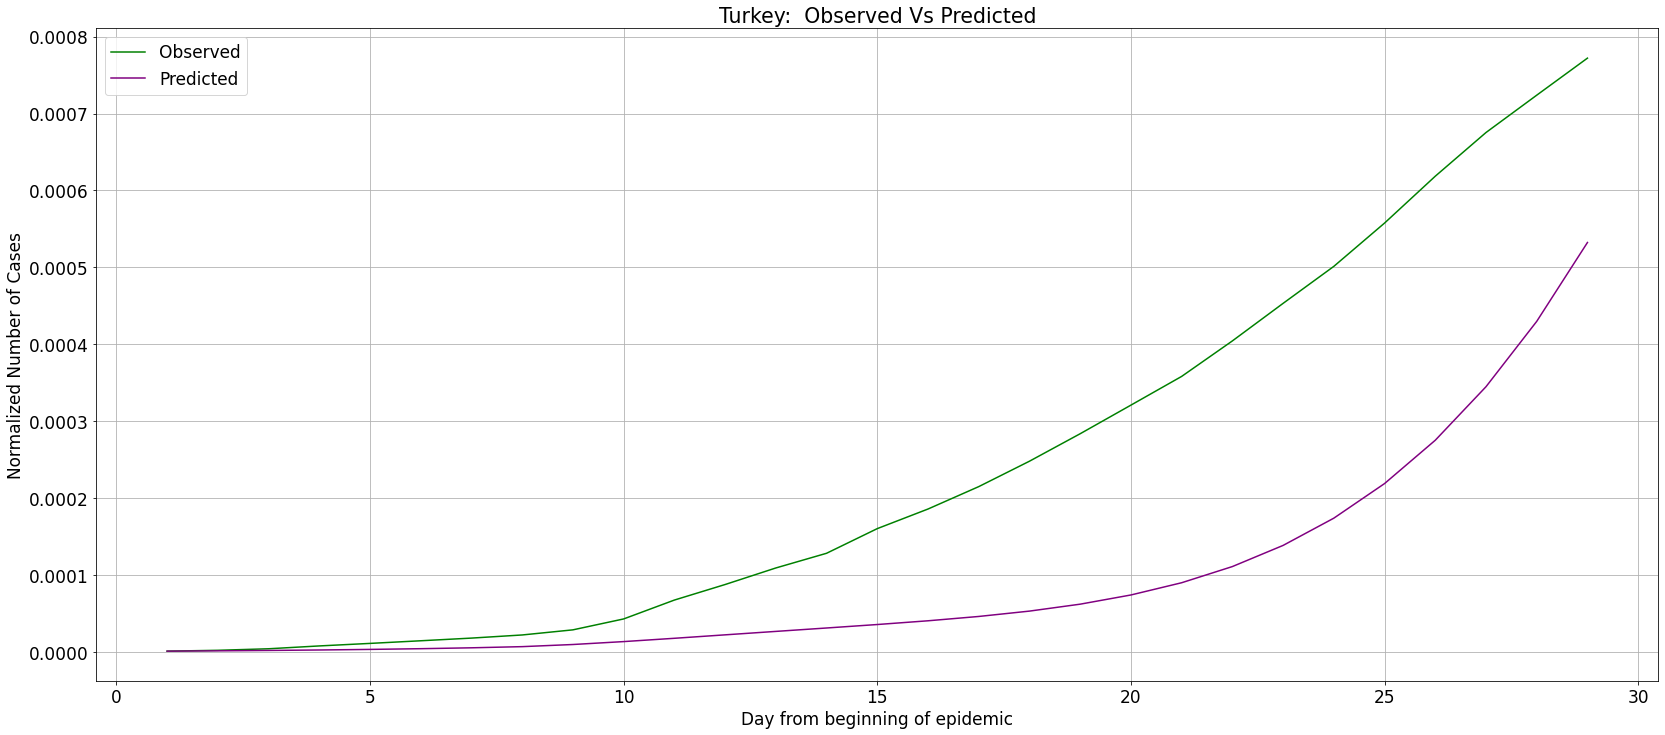

In [1625]:
plt.figure()
plt.plot(x_int1, tur_norm_case[:29], color="green", label = 'Observed')
plt.plot(x_int1, pm1, color="purple", label = 'Predicted')
#plt.xticks(np.arange(0,35,2))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Normalized Number of Cases')
plt.title('Turkey:  Observed Vs Predicted')
plt.rcParams['figure.figsize'] = [28,10]
plt.rcParams.update({'font.size': 17})
plt.legend(loc="upper left")
plt.grid()
plt.show()


Crowd Effect

In [1626]:
k2 = 1
Ip = 0.02
q1 = k2/Ip
rate = q1 * Sign * Ip**2
print(rate)
print(x_int1)

0.019999976760730377
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]


In [1627]:
def equat_rate(t, y,a,b,rate,k3,k6):
# y(0) = S_ign(t)
# y(1) = S_res(t)
# y(2) = Sexh(t)
# y(3) = I(t)
# y(4) = R(t)

#S_exh = 1 - sum(y);

    
    #Sexh = 1 -y[0]-y[1] - y[3] - y[4]
        
    dSigndt = -a * y[0] * y[3] - rate + k6 * y[2]
    dSresdt = rate - k3 * y[1]
    dSexhdt = k3 * y[1] - a * y[2] * y[3] -k6 * y[2]
    
    dIdt = a * y[0] * y[3] + a * y[2] * y[3] - b * y[3]
    dRdt = b * y[3]
    
    return [dSigndt, dSresdt,dSexhdt, dIdt, dRdt]
    
inp = tur_norm_case[:29]

In [1628]:
from scipy.integrate import solve_ivp
sol = solve_ivp(equat_rate, [1, inp.shape[0]], [Sign, Sres,Sexh, I0, R0],args = (a1,b,rate,k3,k6), t_eval=x_int1)
#print(sol.y)

In [1629]:
pc1 = sol.y[3] + sol.y[4]

MSE = np.mean(np.square(pc1 - inp))

print(a1,MSE)
print(pc1)
#print(tur_norm_case[:29])

0.3105025774435757 8.948735781701464e-08
[1.16196348e-06 1.55896623e-06 2.03622592e-06 2.60667016e-06
 3.28452424e-06 4.08527520e-06 5.02243765e-06 6.09500630e-06
 7.32812143e-06 8.75129138e-06 1.03931171e-05 1.22812922e-05
 1.44426027e-05 1.69029273e-05 1.96872375e-05 2.28195972e-05
 2.63231627e-05 3.02201834e-05 3.45320007e-05 3.92790492e-05
 4.44808556e-05 5.01560394e-05 5.63223127e-05 6.29964803e-05
 7.01948081e-05 7.79311147e-05 8.62140818e-05 9.50492244e-05
 1.04438966e-04]


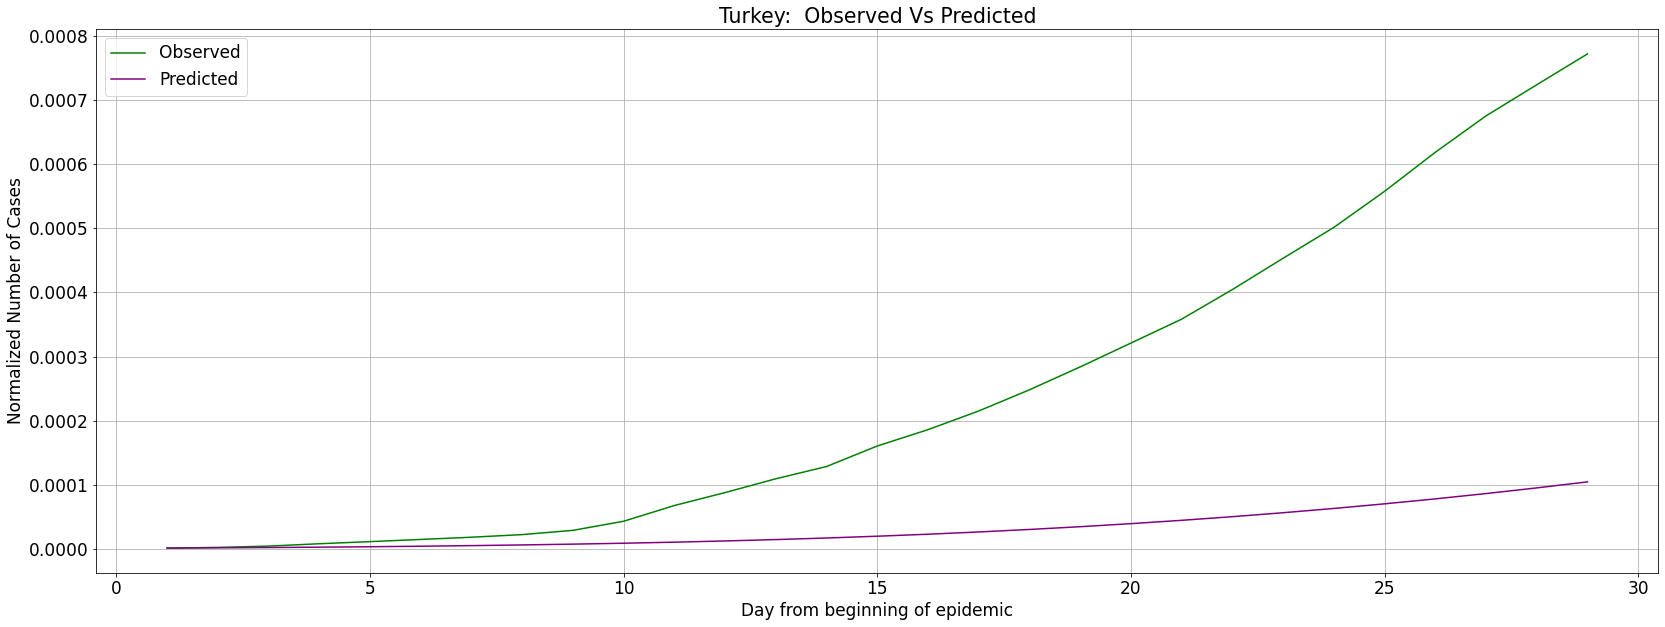

In [1630]:
plt.figure()
plt.plot(x_int1, tur_norm_case[:29], color="green", label = 'Observed')
plt.plot(x_int1, pc1, color="purple", label = 'Predicted')
#plt.xticks(np.arange(0,35,2))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Normalized Number of Cases')
plt.title('Turkey:  Observed Vs Predicted')
plt.rcParams['figure.figsize'] = [28,10]
plt.rcParams.update({'font.size': 17})
plt.legend(loc="upper left")
plt.grid()
plt.show()

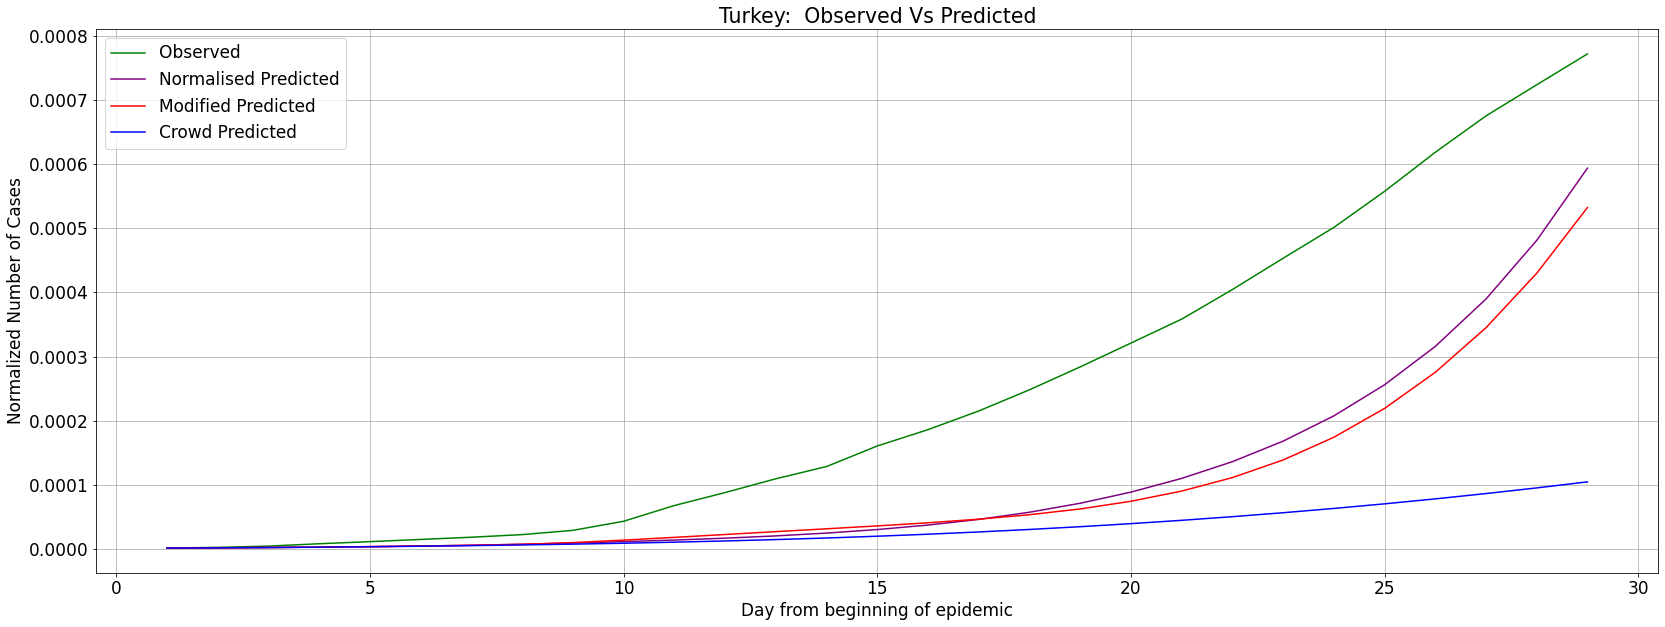

In [1631]:
plt.figure()
plt.plot(x_int1, tur_norm_case[:29], color="green", label = 'Observed')
plt.plot(x_int1, p1, color="purple",  label = 'Normalised Predicted')
plt.plot(x_int1, pm1, color="red", label = 'Modified Predicted')
plt.plot(x_int1, pc1, color="blue", label = 'Crowd Predicted')
#plt.xticks(np.arange(0,35,2))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Normalized Number of Cases')
plt.title('Turkey:  Observed Vs Predicted')
plt.rcParams['figure.figsize'] = [28,10]
plt.rcParams.update({'font.size': 17})
plt.legend(loc="upper left")
plt.grid()
plt.show()

### Interval 2: 29 - 132

In [1632]:
obv_y = tur_norm_case[29:132]

linreg = c2 + r2 * x_int2
expit(linreg)
exp_y = np.exp(linreg)

In [1633]:
day_10 = tur_new['Cumulative_cases'][19]
R1 = day_10 / tur_pop
print(R1)
I1 = tur_new['Cumulative_cases'][29]/tur_pop - R1
print(I0)
S1 = 1- I1 - R1
print(S1)
Sign = S1
print(Sign)
Sres = 0
Sexh = 1 - (Sign + Sres + I1 + R1)

0.0002837799383447949
1.1619634811477353e-06
0.9992279938344795
0.9992279938344795


In [1634]:
b=0.1
a2= r2+b
print(a2)

0.10877202711446118


In [1635]:
def equations(t, y,a,b,k2,k3,k6):
# y(0) = S_ign(t)
# y(1) = S_res(t)
# y(2) = Sexh(t)
# y(3) = I(t)
# y(4) = R(t)

#S_exh = 1 - sum(y);

    
    #Sexh = 1 -y[0]-y[1] - y[3] - y[4]
        
    dSigndt = -a * y[0] * y[3] - k2 * y[0] * y[3] + k6 * y[2]
    dSresdt = k2 * y[0] * y[3] - k3 * y[1]
    dSexhdt = k3 * y[1] - a * y[2] * y[3] -k6 * y[2]
    
    dIdt = a * y[0] * y[3] + a * y[2] * y[3] - b * y[3]
    dRdt = b * y[3]
    
    return [dSigndt, dSresdt,dSexhdt, dIdt, dRdt]
inp = tur_norm_case[29:132]


In [1636]:
from scipy.integrate import solve_ivp
sol = solve_ivp(equations, [1, inp.shape[0]], [Sign,Sres,Sexh,I1, R1], args = (a2,b,k2,k3,k6), t_eval=x_int2-29)
sol.y

array([[9.99227994e-01, 9.98684893e-01, 9.98137480e-01, 9.97585851e-01,
        9.97030094e-01, 9.96470300e-01, 9.95906555e-01, 9.95338945e-01,
        9.94767555e-01, 9.94192466e-01, 9.93613760e-01, 9.93031517e-01,
        9.92445814e-01, 9.91856730e-01, 9.91264339e-01, 9.90668714e-01,
        9.90069943e-01, 9.89468107e-01, 9.88863270e-01, 9.88255494e-01,
        9.87644838e-01, 9.87031365e-01, 9.86415134e-01, 9.85796206e-01,
        9.85174638e-01, 9.84550489e-01, 9.83923818e-01, 9.83294681e-01,
        9.82663135e-01, 9.82029237e-01, 9.81393042e-01, 9.80754606e-01,
        9.80113981e-01, 9.79471224e-01, 9.78826386e-01, 9.78179521e-01,
        9.77530682e-01, 9.76879918e-01, 9.76227283e-01, 9.75572826e-01,
        9.74916597e-01, 9.74258645e-01, 9.73599020e-01, 9.72937770e-01,
        9.72274943e-01, 9.71610585e-01, 9.70944744e-01, 9.70277464e-01,
        9.69608801e-01, 9.68938812e-01, 9.68267529e-01, 9.67594985e-01,
        9.66921214e-01, 9.66246246e-01, 9.65570116e-01, 9.648928

In [1637]:
#p = 1 - sol.y[0, :]
p2 = sol.y[3] + sol.y[4]
MSE = np.mean(np.square(p2 - inp))
print(p2)
print(a2,MSE)

[0.00077201 0.00082529 0.000879   0.00093315 0.00098773 0.00104275
 0.0010982  0.00115408 0.00121041 0.00126717 0.00132437 0.00138201
 0.00144008 0.0014986  0.00155755 0.00161695 0.00167678 0.00173706
 0.00179777 0.00185893 0.00192053 0.00198257 0.00204505 0.00210798
 0.00217135 0.00223517 0.00229942 0.00236412 0.00242927 0.00249486
 0.00256089 0.00262737 0.00269429 0.00276166 0.00282947 0.00289773
 0.00296643 0.00303557 0.00310516 0.0031752  0.00324568 0.0033166
 0.00338797 0.00345978 0.00353203 0.00360473 0.00367787 0.00375145
 0.00382548 0.00389995 0.00397486 0.00405021 0.004126   0.00420223
 0.0042789  0.00435601 0.00443356 0.00451155 0.00458998 0.00466885
 0.00474815 0.00482789 0.00490807 0.00498869 0.00506973 0.00515122
 0.00523313 0.00531548 0.00539827 0.00548148 0.00556512 0.0056492
 0.0057337  0.00581863 0.00590399 0.00598977 0.00607598 0.00616261
 0.00624966 0.00633714 0.00642503 0.00651335 0.00660208 0.00669123
 0.0067808  0.00687078 0.00696117 0.00705197 0.00714318 0.007234

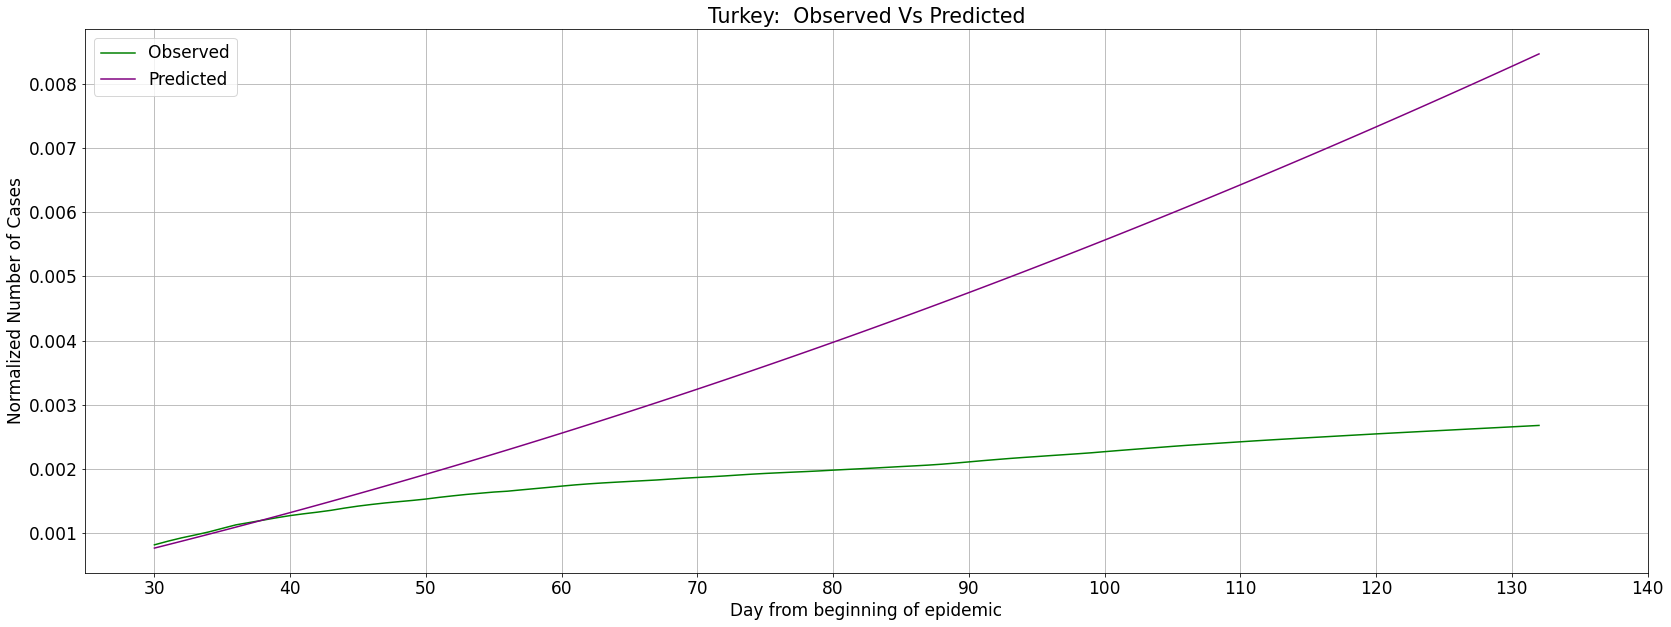

In [1638]:
plt.figure()
plt.plot(x_int2, tur_norm_case[29:132], color="green", label = 'Observed')
plt.plot(x_int2, p2, color="purple", label = 'Predicted')
plt.xticks(np.arange(30,150,10))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Normalized Number of Cases')
plt.title('Turkey:  Observed Vs Predicted')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})

plt.grid()
plt.show()

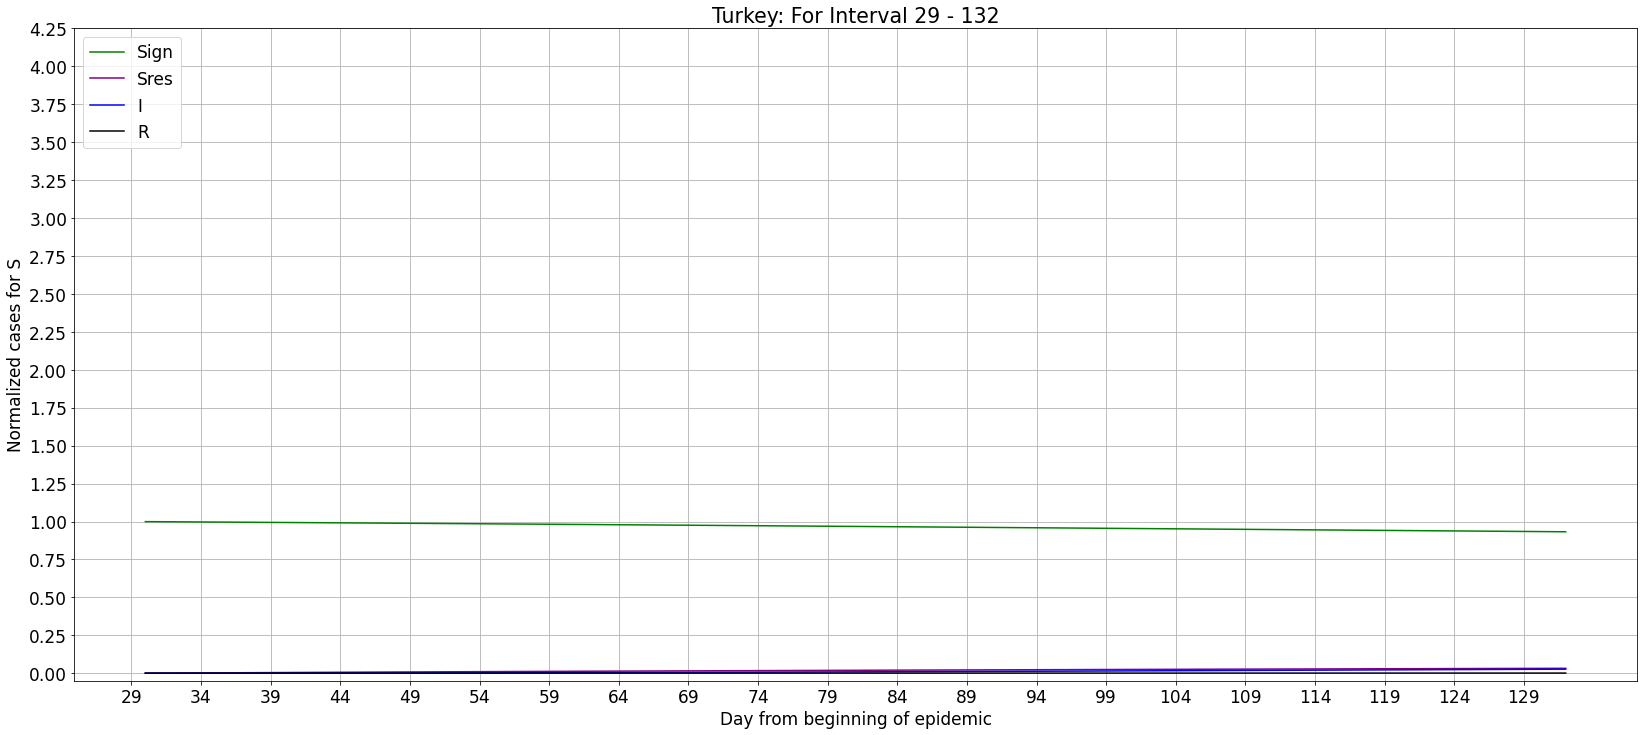

In [1639]:
plt.figure()
plt.plot(x_int2,sol.y[0],color="green", label = 'Sign')
plt.plot(x_int2,sol.y[1], color="purple",label = 'Sres')
plt.plot(x_int2,sol.y[2], color="blue",label = 'I')
plt.plot(x_int2,sol.y[3], color="black",label = 'R')
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Normalized cases for S')
plt.xticks(np.arange(29,132,5))
plt.yticks(np.arange(0,4.5,0.25))
plt.title('Turkey: For Interval 29 - 132')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

Modified Model

In [1640]:
k2 = 0.05
sol = solve_ivp(equations, [1, inp.shape[0]], [Sign,Sres,Sexh,I1, R1], args = (a2,b,k2,k3,k6), t_eval=x_int2-29)

In [1641]:
pm2 = sol.y[3] + sol.y[4]
MSE = np.mean(np.square(pm2 - inp))
print(pm2)
print(a2,MSE)

[0.00077201 0.0008253  0.00087905 0.00093327 0.00098796 0.00104311
 0.00109874 0.00115485 0.00121144 0.00126852 0.00132608 0.00138414
 0.0014427  0.00150175 0.00156131 0.00162137 0.00168195 0.00174304
 0.00180465 0.00186679 0.00192945 0.00199264 0.00205637 0.00212063
 0.00218544 0.00225079 0.00231669 0.00238315 0.00245016 0.00251774
 0.00258588 0.00265459 0.00272388 0.00279375 0.00286419 0.00293523
 0.00300686 0.00307908 0.0031519  0.00322532 0.00329935 0.003374
 0.00344926 0.00352514 0.00360165 0.00367878 0.00375655 0.00383496
 0.00391401 0.0039937  0.00407405 0.00415505 0.00423671 0.00431903
 0.00440203 0.00448569 0.00457004 0.00465506 0.00474078 0.00482718
 0.00491428 0.00500208 0.00509058 0.00517979 0.00526972 0.00536036
 0.00545173 0.00554382 0.00563665 0.00573022 0.00582452 0.00591957
 0.00601538 0.00611193 0.00620925 0.00630734 0.00640619 0.00650582
 0.00660622 0.00670741 0.00680939 0.00691216 0.00701573 0.00712011
 0.00722529 0.00733128 0.00743809 0.00754572 0.00765417 0.007763

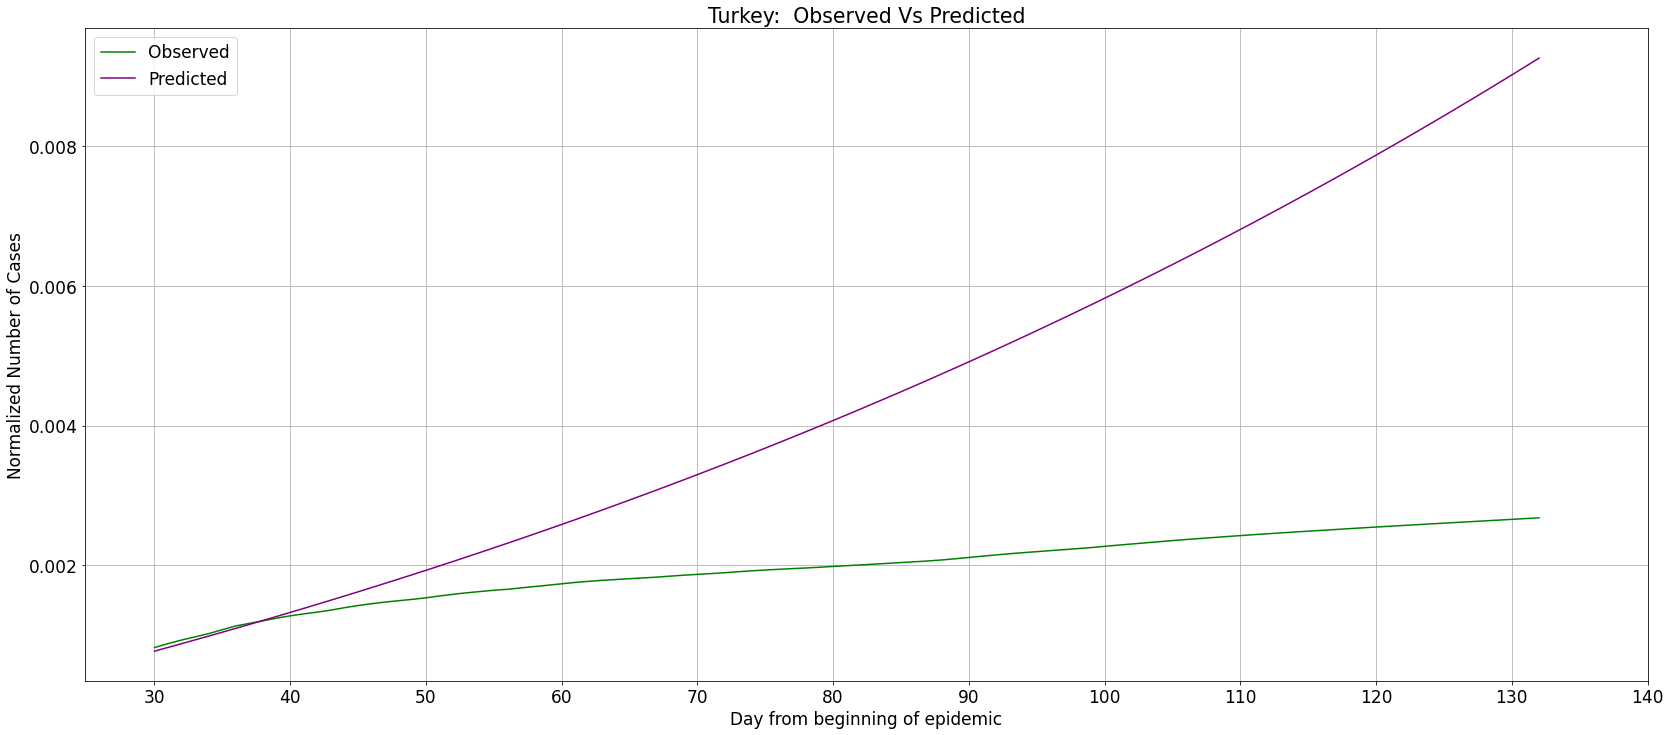

In [1642]:
plt.figure()
plt.plot(x_int2, tur_norm_case[29:132], color="green", label = 'Observed')
plt.plot(x_int2, pm2, color="purple", label = 'Predicted')
plt.xticks(np.arange(30,150,10))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Normalized Number of Cases')
plt.title('Turkey:  Observed Vs Predicted')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})

plt.grid()
plt.show()

Crowd Effect

In [1643]:
k2 = 1
Ip = 0.02
q1 = k2/Ip
rate = q1 * Sign * Ip**2
print(rate)
print(x_int2)

0.01998455987668959
[ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132]


In [1644]:
def equat_rate(t, y,a,b,rate,k3,k6):
# y(0) = S_ign(t)
# y(1) = S_res(t)
# y(2) = Sexh(t)
# y(3) = I(t)
# y(4) = R(t)

#S_exh = 1 - sum(y);

    
    #Sexh = 1 -y[0]-y[1] - y[3] - y[4]
        
    dSigndt = -a * y[0] * y[3] - rate + k6 * y[2]
    dSresdt = rate - k3 * y[1]
    dSexhdt = k3 * y[1] - a * y[2] * y[3] -k6 * y[2]
    
    dIdt = a * y[0] * y[3] + a * y[2] * y[3] - b * y[3]
    dRdt = b * y[3]
    
    return [dSigndt, dSresdt,dSexhdt, dIdt, dRdt]
    
inp = tur_norm_case[29:132]

In [1645]:
from scipy.integrate import solve_ivp
sol = solve_ivp(equat_rate, [1, inp.shape[0]], [Sign,Sres,Sexh,I1, R1], args = (a2,b,rate,k3,k6), t_eval=x_int2-29)
sol.y

array([[ 9.99227994e-01,  9.79191354e-01,  9.59159374e-01,
         9.39135989e-01,  9.19125015e-01,  8.99130153e-01,
         8.79154984e-01,  8.59203141e-01,  8.39278022e-01,
         8.19382747e-01,  7.99520353e-01,  7.79693794e-01,
         7.59905943e-01,  7.40159591e-01,  7.20457447e-01,
         7.00802136e-01,  6.81196203e-01,  6.61642111e-01,
         6.42142239e-01,  6.22698886e-01,  6.03314268e-01,
         5.83990519e-01,  5.64729690e-01,  5.45533753e-01,
         5.26404594e-01,  5.07344239e-01,  4.88354760e-01,
         4.69437599e-01,  4.50594147e-01,  4.31825758e-01,
         4.13133752e-01,  3.94519413e-01,  3.75983992e-01,
         3.57528703e-01,  3.39154726e-01,  3.20863205e-01,
         3.02655250e-01,  2.84531936e-01,  2.66494302e-01,
         2.48543353e-01,  2.30680058e-01,  2.12905353e-01,
         1.95220137e-01,  1.77625274e-01,  1.60121595e-01,
         1.42709892e-01,  1.25390927e-01,  1.08165424e-01,
         9.10340718e-02,  7.39975254e-02,  5.70564043e-0

In [1646]:
#p = 1 - sol.y[0, :]
pc1 = sol.y[3] + sol.y[4]
MSE = np.mean(np.square(pc1 - inp))
print(pc1)
print(a3,MSE)

[0.00077201 0.00082475 0.00087679 0.00092802 0.00097835 0.00102769
 0.00107598 0.00112312 0.00116904 0.00121371 0.00125709 0.00129914
 0.00133985 0.00137919 0.00141714 0.00145369 0.00148883 0.00152257
 0.0015549  0.00158584 0.00161538 0.00164356 0.00167039 0.00169589
 0.00172011 0.00174305 0.00176473 0.0017852  0.00180451 0.00182273
 0.00183989 0.00185606 0.00187127 0.00188558 0.00189903 0.00191166
 0.00192352 0.00193464 0.00194506 0.00195482 0.00196394 0.00197247
 0.00198044 0.00198786 0.00199478 0.00200121 0.00200717 0.0020127
 0.00201781 0.00202251 0.00202683 0.00203078 0.00203437 0.00203767
 0.00204073 0.00204356 0.00204617 0.00204857 0.00205078 0.00205279
 0.00205463 0.00205631 0.00205783 0.0020592  0.00206045 0.00206156
 0.00206257 0.00206347 0.00206427 0.002065   0.00206565 0.00206624
 0.00206678 0.00206727 0.00206774 0.00206818 0.0020686  0.002069
 0.00206937 0.00206971 0.00207002 0.0020703  0.00207056 0.00207079
 0.00207099 0.00207117 0.00207133 0.00207147 0.00207159 0.0020716

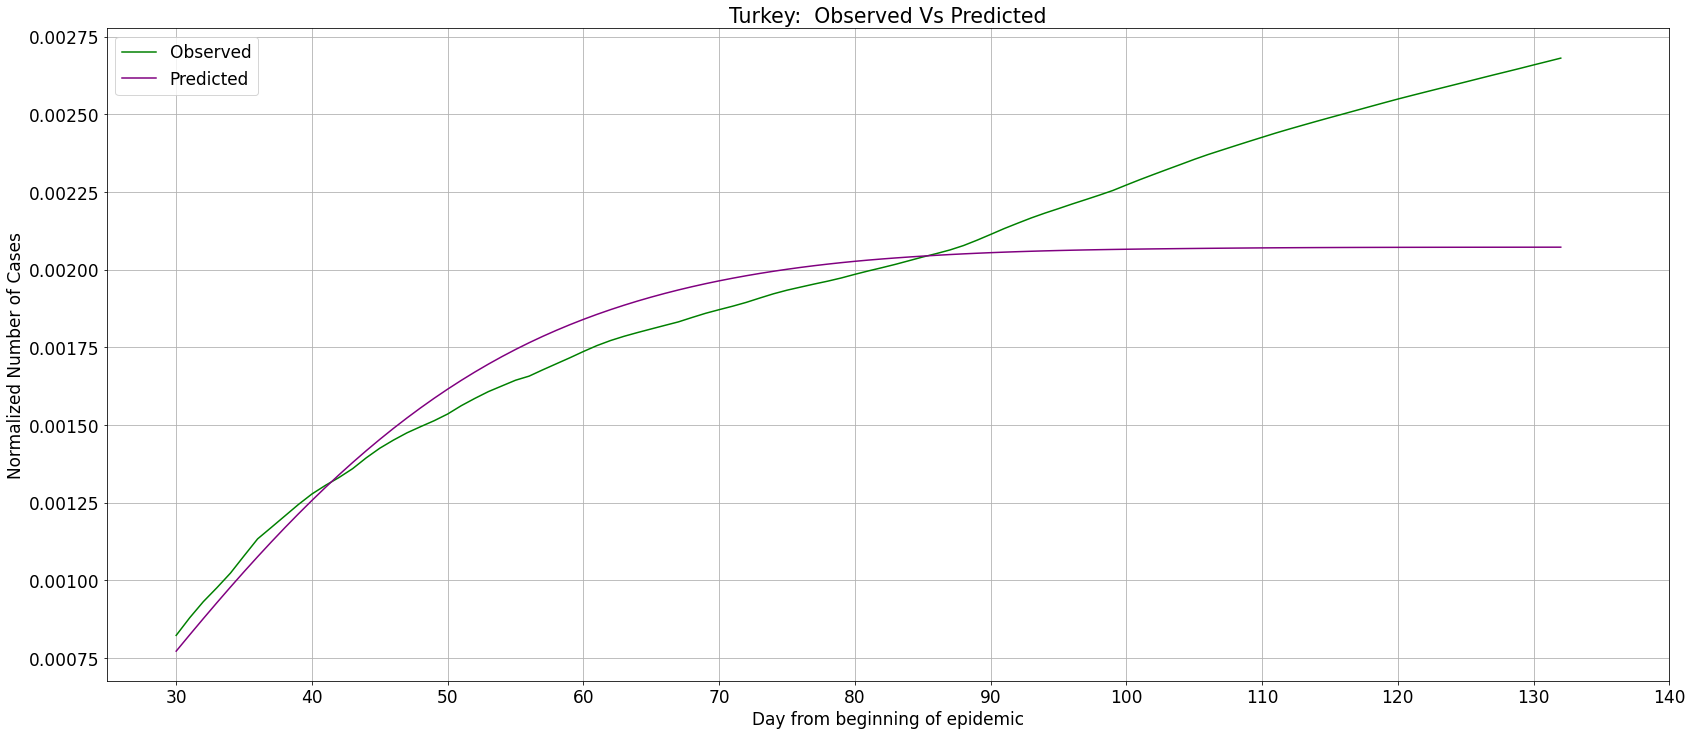

In [1647]:
plt.figure()
plt.plot(x_int2, tur_norm_case[29:132], color="green", label = 'Observed')
plt.plot(x_int2, pc1, color="purple", label = 'Predicted')
plt.xticks(np.arange(30,150,10))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Normalized Number of Cases')
plt.title('Turkey:  Observed Vs Predicted')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})

plt.grid()
plt.show()

### Interval 3: 1 - 132

In [1648]:
obv_y = tur_norm_case[:132]

linreg = c3 + r3 * x_int3
expit(linreg)
exp_y = np.exp(linreg)

In [1649]:
day_10 = tur['Cumulative_cases'][66]
R2 = day_10 / tur_pop
print(R2)
I2 = tur_new['Cumulative_cases'][1]/tur_pop - R2
print(I2)
S2 = 1- I2 - R2
print(S2)
Sign = S2
Sres = 1- Sign
Sexh = 1- (Sign +Sres +I2+R2)

0.0
1.1619634811477353e-06
0.9999988380365189


In [1650]:
b=0.1
a3= r3+b
print(a3)

0.13022144547571432


In [1651]:
def equations(t, y,a,b,k2,k3,k6):
# y(0) = S_ign(t)
# y(1) = S_res(t)
# y(2) = Sexh(t)
# y(3) = I(t)
# y(4) = R(t)

#S_exh = 1 - sum(y);

    
    #Sexh = 1 -y[0]-y[1] - y[3] - y[4]
        
    dSigndt = -a * y[0] * y[3] - k2 * y[0] * y[3] + k6 * y[2]
    dSresdt = k2 * y[0] * y[3] - k3 * y[1]
    dSexhdt = k3 * y[1] - a * y[2] * y[3] -k6 * y[2]
    
    dIdt = a * y[0] * y[3] + a * y[2] * y[3] - b * y[3]
    dRdt = b * y[3]
    
    return [dSigndt, dSresdt,dSexhdt, dIdt, dRdt]
inp = tur_norm_case[:132]

In [1652]:
from scipy.integrate import solve_ivp
sol = solve_ivp(equations, [1, inp.shape[0]], [Sign,Sres,Sexh,I2, R2], args = (a3,b,k2,k3,k6), t_eval=x_int3)

In [1653]:
#p = 1 - sol.y[0, :]
p3 = sol.y[2] + sol.y[4]
MSE = np.mean(np.square(p3 - inp))

print(a3,MSE)
print(p3)

0.13022144547571432 2.4584464833542052e-06
[-1.16196348e-06 -9.97917047e-07 -8.07793183e-07 -5.91434175e-07
 -3.48662284e-07 -7.92796957e-08  2.16938958e-07  5.40199113e-07
  8.90706136e-07  1.26869629e-06  1.67443672e-06  2.10822547e-06
  2.57039149e-06  3.06129459e-06  3.58132551e-06  4.13090584e-06
  4.71048810e-06  5.32055569e-06  5.96162289e-06  6.63423488e-06
  7.33896775e-06  8.07642845e-06  8.84725484e-06  9.65211568e-06
  1.04917106e-05  1.13667702e-05  1.22780557e-05  1.32263597e-05
  1.42125053e-05  1.52373465e-05  1.63017684e-05  1.74066869e-05
  1.85530487e-05  1.97418315e-05  2.09740440e-05  2.22507254e-05
  2.35729463e-05  2.49418078e-05  2.63584421e-05  2.78240121e-05
  2.93397119e-05  3.09067662e-05  3.25264307e-05  3.41999920e-05
  3.59287677e-05  3.77141060e-05  3.95573863e-05  4.14600187e-05
  4.34234442e-05  4.54491349e-05  4.75385936e-05  4.96949080e-05
  5.19292119e-05  5.42431132e-05  5.66364248e-05  5.91091589e-05
  6.16615276e-05  6.42939427e-05  6.70070159e-0

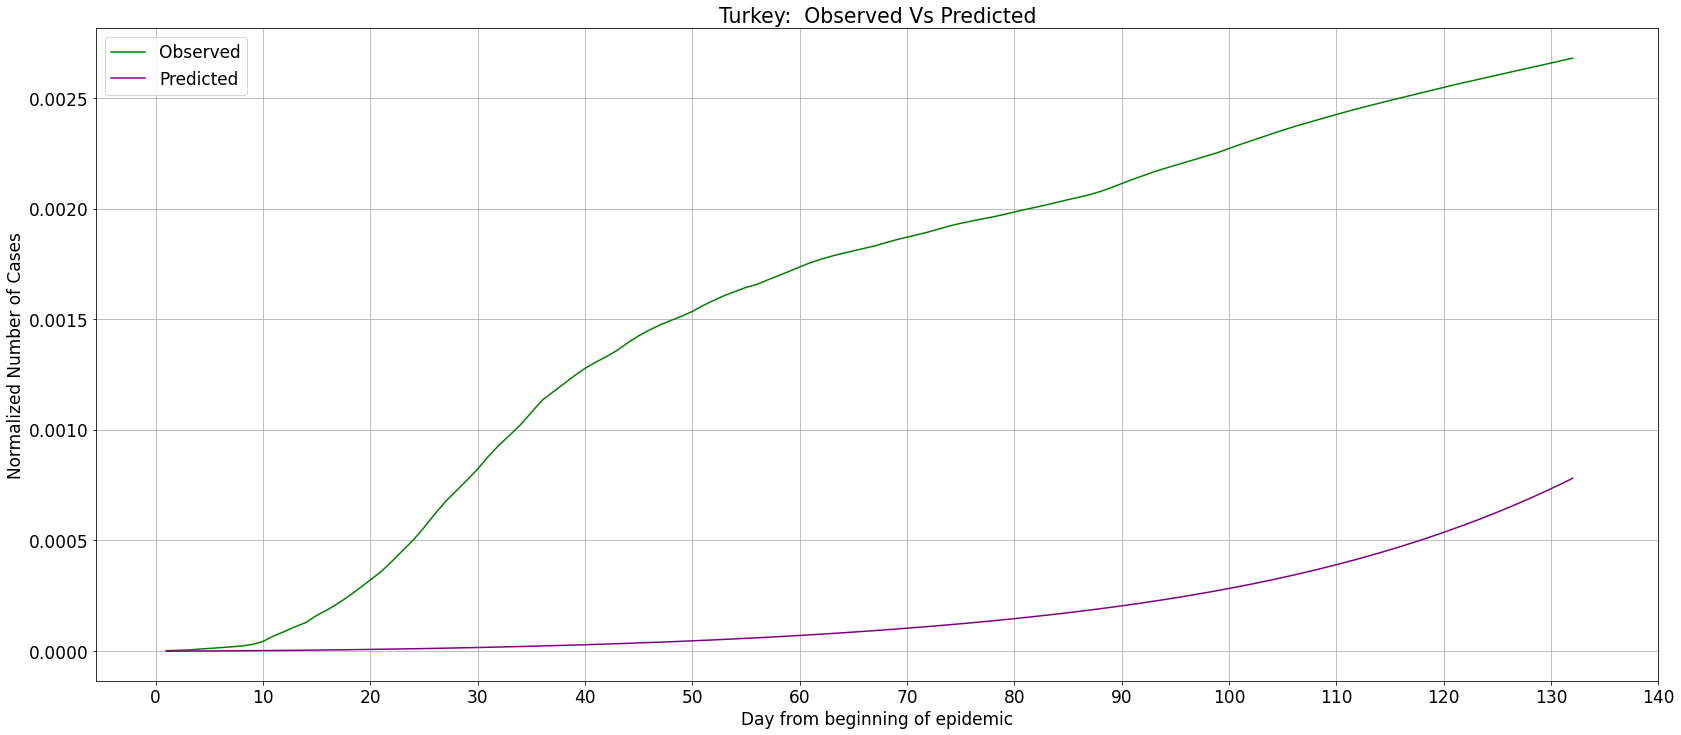

In [1654]:
plt.figure()
plt.plot(x_int3, tur_norm_case[:132], color="green", label = 'Observed')
plt.plot(x_int3, p3, color="purple", label = 'Predicted')
plt.xticks(np.arange(0,150,10))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Normalized Number of Cases')
plt.title('Turkey:  Observed Vs Predicted')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

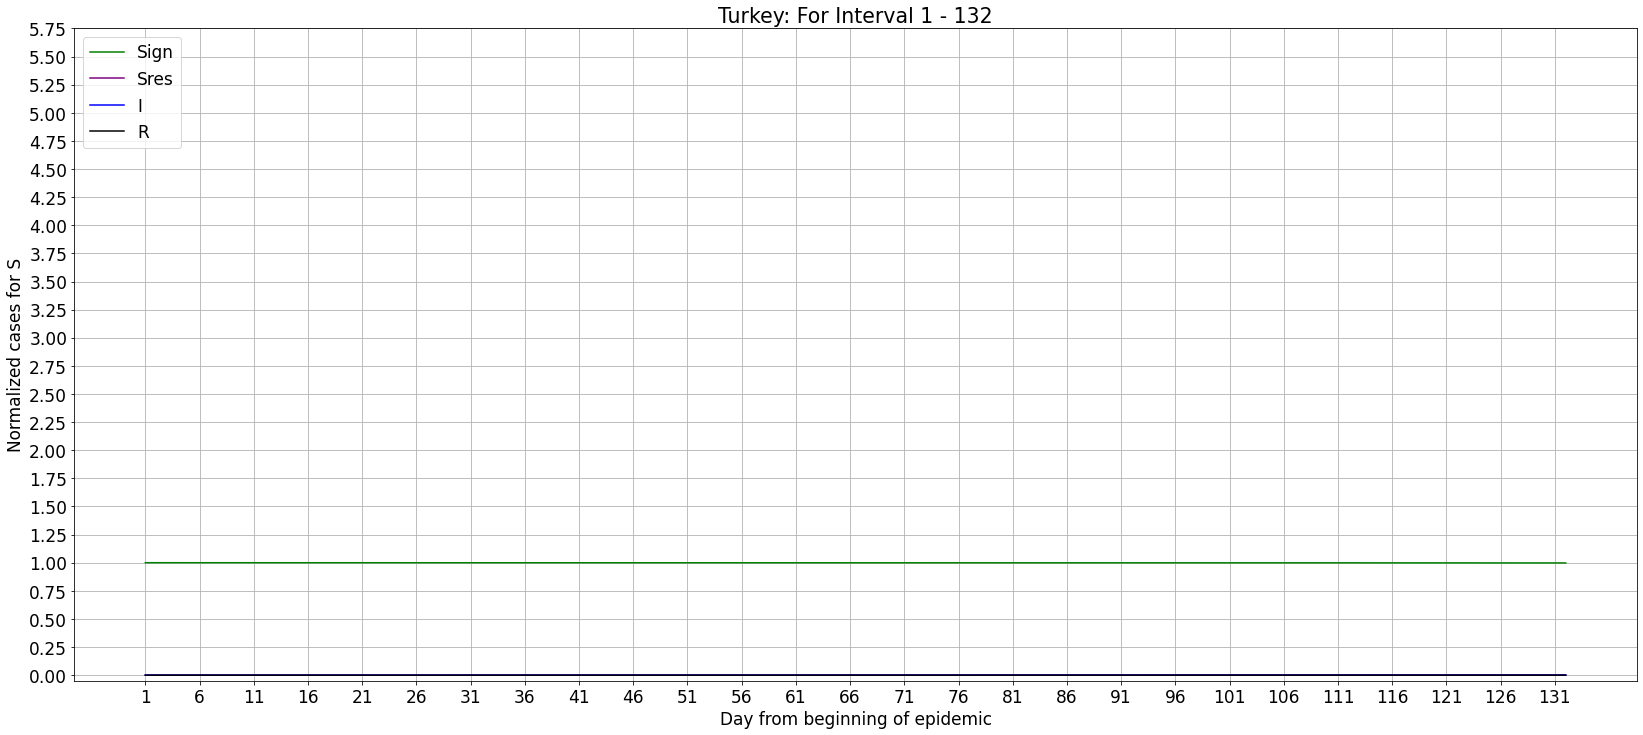

In [1655]:
plt.figure()
plt.plot(x_int3,sol.y[0],color="green", label = 'Sign')
plt.plot(x_int3,sol.y[1], color="purple",label = 'Sres')
plt.plot(x_int3,sol.y[2], color="blue",label = 'I')
plt.plot(x_int3,sol.y[3], color="black",label = 'R')
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Normalized cases for S')
plt.xticks(np.arange(1,132,5))
plt.yticks(np.arange(0,6.0,0.25))
plt.title('Turkey: For Interval 1 - 132')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

Modified Model

In [1656]:
k2 = 0.05
sol = solve_ivp(equations, [1, inp.shape[0]], [Sign,Sres,Sexh,I2, R2], args = (a3,b,k2,k3,k6), t_eval=x_int3)

In [1657]:
pm3 = sol.y[3] + sol.y[4]
MSE = np.mean(np.square(pm3 - inp))

print(a3,MSE)
print(pm3)

0.13022144547571432 2.947325414116567e-06
[1.16196348e-06 1.31558533e-06 1.47392087e-06 1.63711442e-06
 1.80531487e-06 1.97867591e-06 2.15735604e-06 2.34151857e-06
 2.53135795e-06 2.72749084e-06 2.93014670e-06 3.13937588e-06
 3.35524412e-06 3.57783253e-06 3.80723758e-06 4.04357113e-06
 4.28696039e-06 4.53754795e-06 4.79549178e-06 5.06096522e-06
 5.33415697e-06 5.61527110e-06 5.90452707e-06 6.20215970e-06
 6.50841918e-06 6.82357107e-06 7.14789631e-06 7.48169121e-06
 7.82526744e-06 8.17895206e-06 8.54308748e-06 8.91803150e-06
 9.30415728e-06 9.70185336e-06 1.01115236e-05 1.05335874e-05
 1.09684793e-05 1.14166494e-05 1.18785630e-05 1.23547009e-05
 1.28455593e-05 1.33516496e-05 1.38734988e-05 1.44116490e-05
 1.49666580e-05 1.55390986e-05 1.61295594e-05 1.67386439e-05
 1.73669713e-05 1.80151762e-05 1.86839082e-05 1.93738328e-05
 2.00856304e-05 2.08199970e-05 2.15776440e-05 2.23592980e-05
 2.31657012e-05 2.39976110e-05 2.48558003e-05 2.57410571e-05
 2.66541851e-05 2.75960033e-05 2.85673459e-

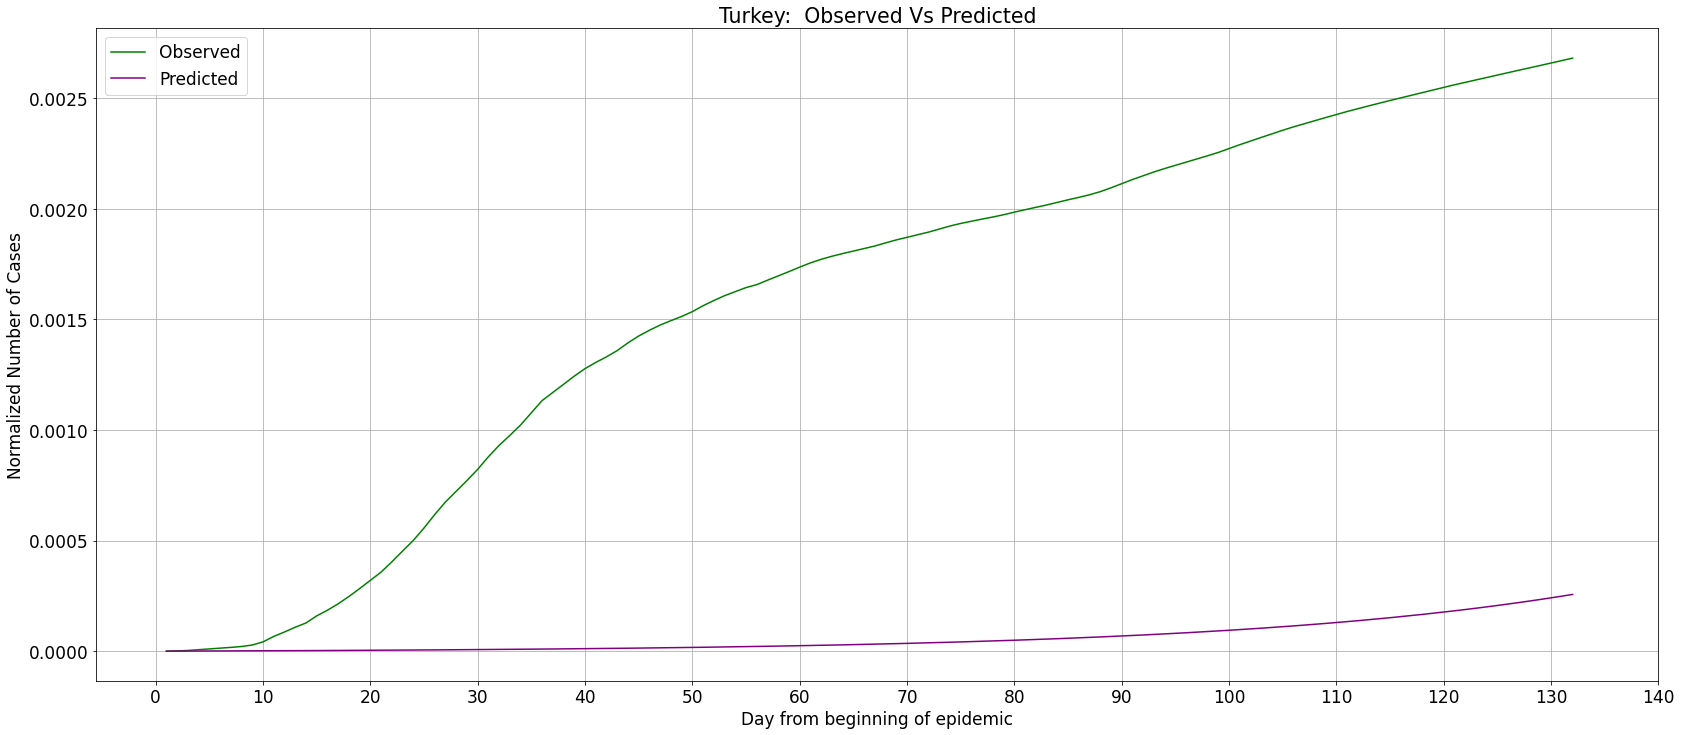

In [1658]:
plt.figure()
plt.plot(x_int3, tur_norm_case[:132], color="green", label = 'Observed')
plt.plot(x_int3, pm3, color="purple", label = 'Predicted')
plt.xticks(np.arange(0,150,10))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Normalized Number of Cases')
plt.title('Turkey:  Observed Vs Predicted')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

Crowd Effect

In [1659]:
k2 = 1
Ip = 0.02
q1 = k2/Ip
rate = q1 * Sign * Ip**2
print(rate)
print(x_int3)

0.019999976760730377
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132]


In [1660]:
def equat_rate(t, y,a,b,rate,k3,k6):
# y(0) = S_ign(t)
# y(1) = S_res(t)
# y(2) = Sexh(t)
# y(3) = I(t)
# y(4) = R(t)

#S_exh = 1 - sum(y);

    
    #Sexh = 1 -y[0]-y[1] - y[3] - y[4]
        
    dSigndt = -a * y[0] * y[3] - rate + k6 * y[2]
    dSresdt = rate - k3 * y[1]
    dSexhdt = k3 * y[1] - a * y[2] * y[3] -k6 * y[2]
    
    dIdt = a * y[0] * y[3] + a * y[2] * y[3] - b * y[3]
    dRdt = b * y[3]
    
    return [dSigndt, dSresdt,dSexhdt, dIdt, dRdt]
    
inp = tur_norm_case[:132]

In [1661]:
from scipy.integrate import solve_ivp
sol = solve_ivp(equat_rate, [1, inp.shape[0]], [Sign,Sres,Sexh,I2, R2], args = (a3,b,rate,k3,k6), t_eval=x_int3)

In [1662]:
pc3 = sol.y[2] + sol.y[4]
MSE = np.mean(np.square(pc3 - inp))

print(a3,MSE)
print(pc3)

0.13022144547571432 0.3428960246276573
[-1.16196348e-06  1.97000717e-04  7.83323903e-04  1.74622702e-03
  3.07439076e-03  4.75675422e-03  6.78245106e-03  9.14055899e-03
  1.18209187e-02  1.48136696e-02  1.81091381e-02  2.16978376e-02
  2.55704686e-02  2.97179186e-02  3.41312621e-02  3.88017605e-02
  4.37208626e-02  4.88802038e-02  5.42716068e-02  5.98870811e-02
  6.57188235e-02  7.17592177e-02  7.80008342e-02  8.44364309e-02
  9.10585533e-02  9.78590667e-02  1.04831718e-01  1.11970522e-01
  1.19269586e-01  1.26723111e-01  1.34325393e-01  1.42070820e-01
  1.49953877e-01  1.57969140e-01  1.66111280e-01  1.74375062e-01
  1.82755344e-01  1.91247079e-01  1.99845313e-01  2.08545187e-01
  2.17341933e-01  2.26230881e-01  2.35207452e-01  2.44267162e-01
  2.53405620e-01  2.62618529e-01  2.71901688e-01  2.81250986e-01
  2.90662409e-01  3.00132036e-01  3.09656039e-01  3.19230686e-01
  3.28852336e-01  3.38517444e-01  3.48221669e-01  3.57961086e-01
  3.67733308e-01  3.77535986e-01  3.87366797e-01  3

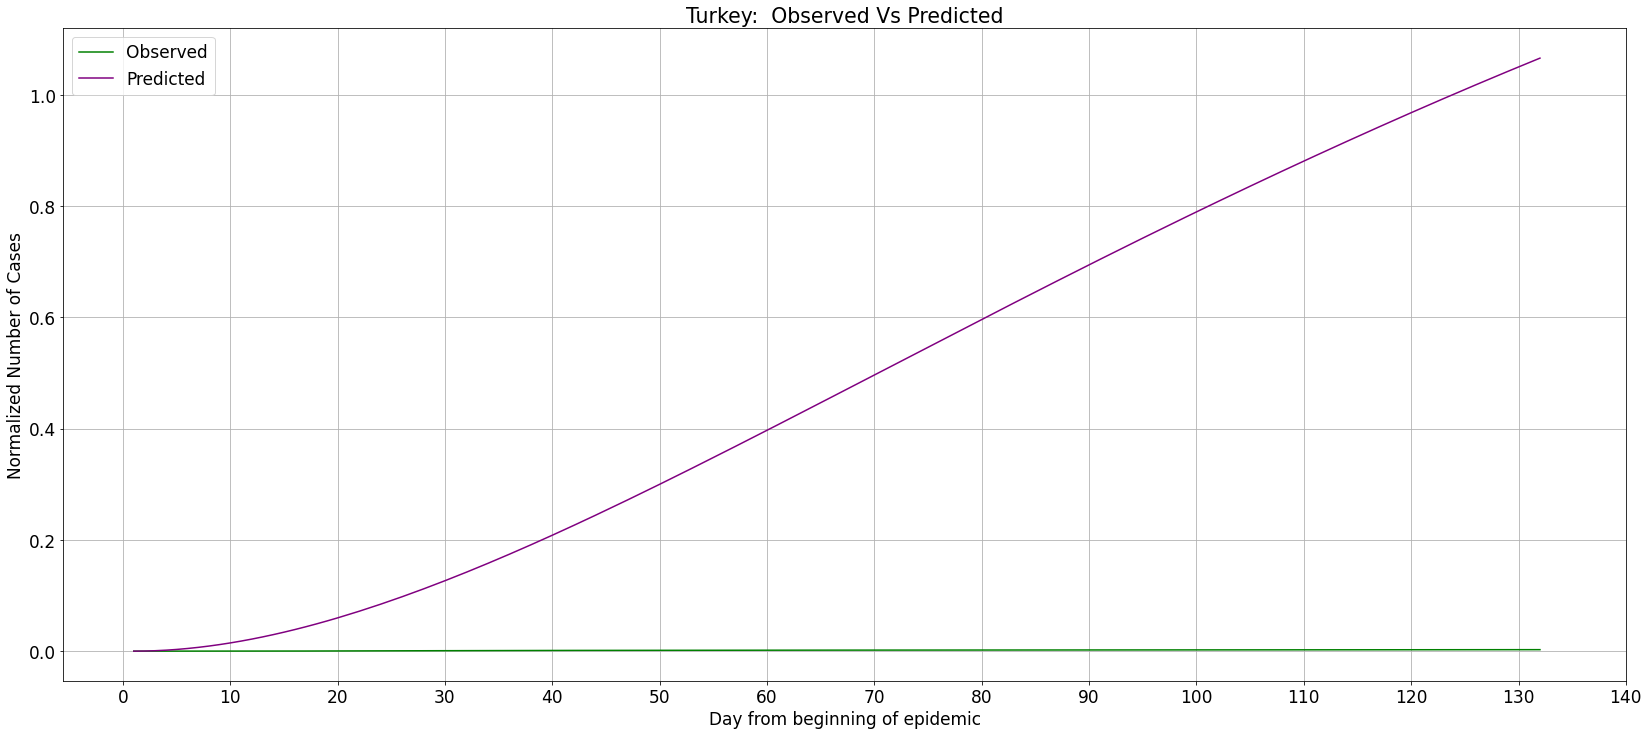

In [1663]:
plt.figure()
plt.plot(x_int3, tur_norm_case[:132], color="green", label = 'Observed')
plt.plot(x_int3, pc3, color="purple", label = 'Predicted')
plt.xticks(np.arange(0,150,10))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Normalized Number of Cases')
plt.title('Turkey:  Observed Vs Predicted')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

### Interval 4: 1 - 551

In [1664]:
obv_y = tur_norm_case[:551]

linreg = c4 + r4 * x_int4
expit(linreg)
exp_y = np.exp(linreg)

In [1665]:
day_10 = tur['Cumulative_cases'][66]
R3 = day_10 / tur_pop
print(R3)
I3 = tur_new['Cumulative_cases'][1]/tur_pop - R3
print(I3)
S3 = 1- I3 - R3
print(S3)
Sign =S3
Sres = 1- Sign
Sexh = 1- (Sign + Sres +I3 + R3)

0.0
1.1619634811477353e-06
0.9999988380365189


In [1666]:
b = 0.1
a4 = r4+b
print(a4)

0.1101968156120996


In [1667]:
def equations(t, y,a,b,k2,k3,k6):
# y(0) = S_ign(t)
# y(1) = S_res(t)
# y(2) = Sexh(t)
# y(3) = I(t)
# y(4) = R(t)

#S_exh = 1 - sum(y);

    
    #Sexh = 1 -y[0]-y[1] - y[3] - y[4]
        
    dSigndt = -a * y[0] * y[3] - k2 * y[0] * y[3] + k6 * y[2]
    dSresdt = k2 * y[0] * y[3] - k3 * y[1]
    dSexhdt = k3 * y[1] - a * y[2] * y[3] -k6 * y[2]
    
    dIdt = a * y[0] * y[3] + a * y[2] * y[3] - b * y[3]
    dRdt = b * y[3]
    
    return [dSigndt, dSresdt,dSexhdt, dIdt, dRdt]
inp = tur_norm_case[:551]

In [1668]:
from scipy.integrate import solve_ivp
sol = solve_ivp(equations, [1, inp.shape[0]], [Sign,Sres,Sexh,I3, R3], args = (a4,b,k2,k3,k6), t_eval=x_int4)


In [1669]:
#p = 1 - sol.y[0, :]
p4 = sol.y[3] + sol.y[4]
MSE = np.mean(np.square(p4 - inp))

print(a4,MSE)

0.1101968156120996 0.001434595842171801


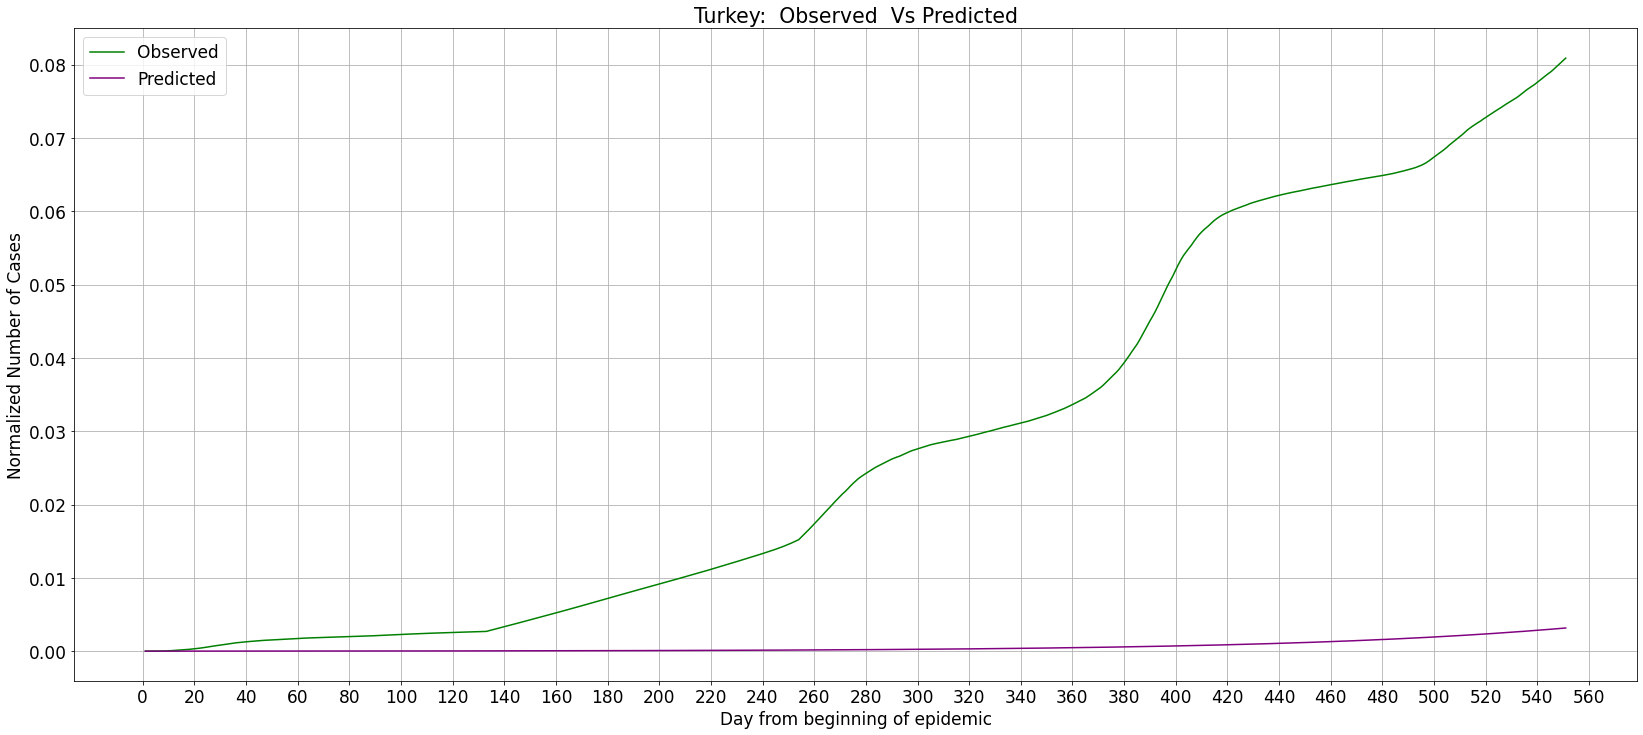

In [1670]:
plt.figure()
plt.plot(x_int4, tur_norm_case[:551], color="green", label = 'Observed')
plt.plot(x_int4, p4, color="purple", label = 'Predicted')
plt.xticks(np.arange(0,580,20))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Normalized Number of Cases')
plt.title('Turkey:  Observed  Vs Predicted')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

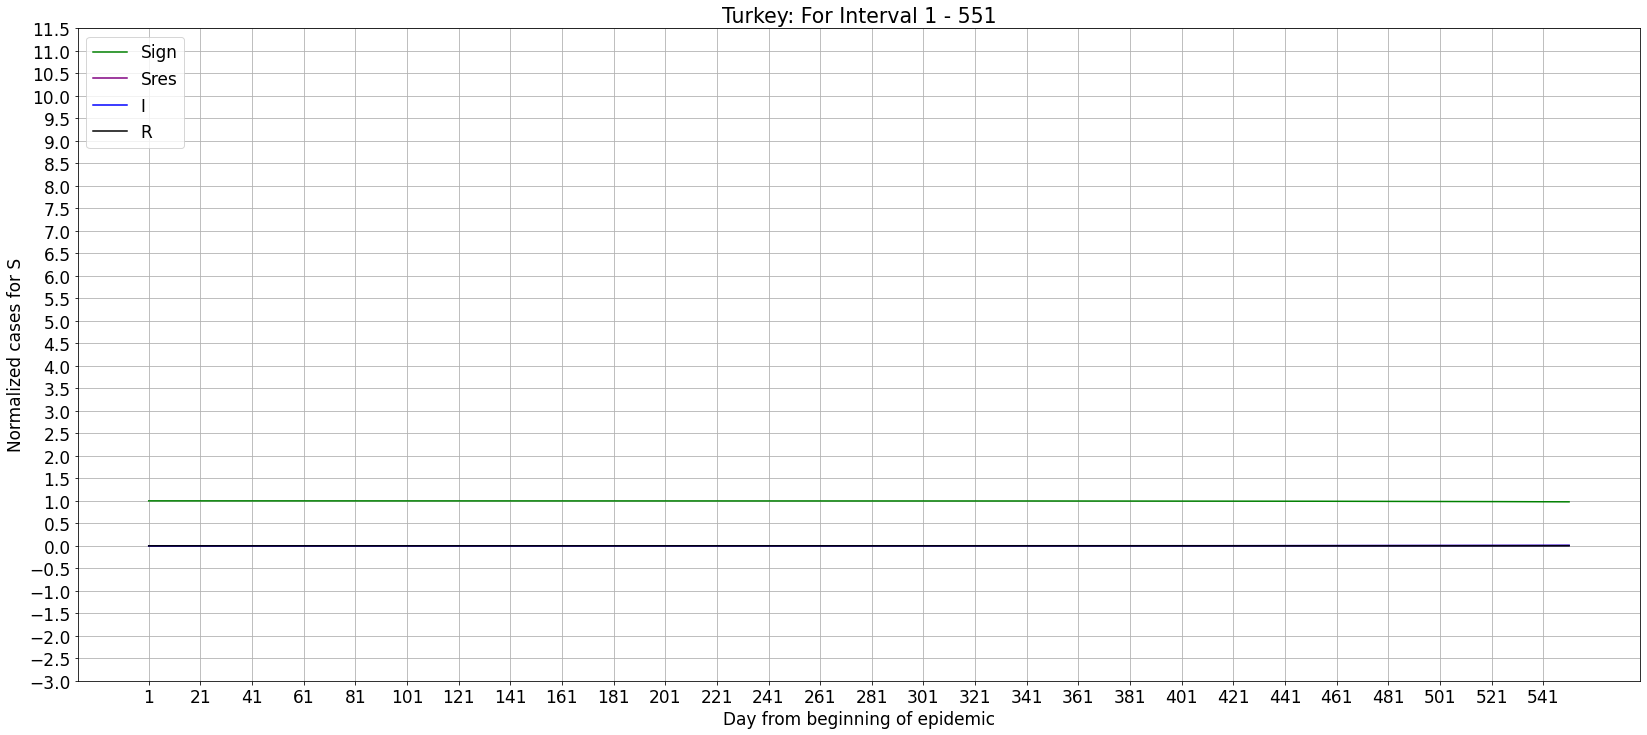

In [1671]:
plt.figure()
plt.plot(x_int4,sol.y[0],color="green", label = 'Sign')
plt.plot(x_int4,sol.y[1], color="purple",label = 'Sres')
plt.plot(x_int4,sol.y[2], color="blue",label = 'I')
plt.plot(x_int4,sol.y[3], color="black",label = 'R')
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Normalized cases for S')
plt.xticks(np.arange(1,551,20))
plt.yticks(np.arange(-3,12,0.5))
plt.title('Turkey: For Interval 1 - 551')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

Modified Model

In [1672]:
k2 = 0.05
sol = solve_ivp(equations, [1, inp.shape[0]], [Sign,Sres,Sexh,I3, R3], args = (a4,b,k2,k3,k6), t_eval=x_int4)

In [1673]:
pm4 = sol.y[3] + sol.y[4]
MSE = np.mean(np.square(pm4 - inp))

print(a4,MSE)

0.1101968156120996 0.001432553674935358


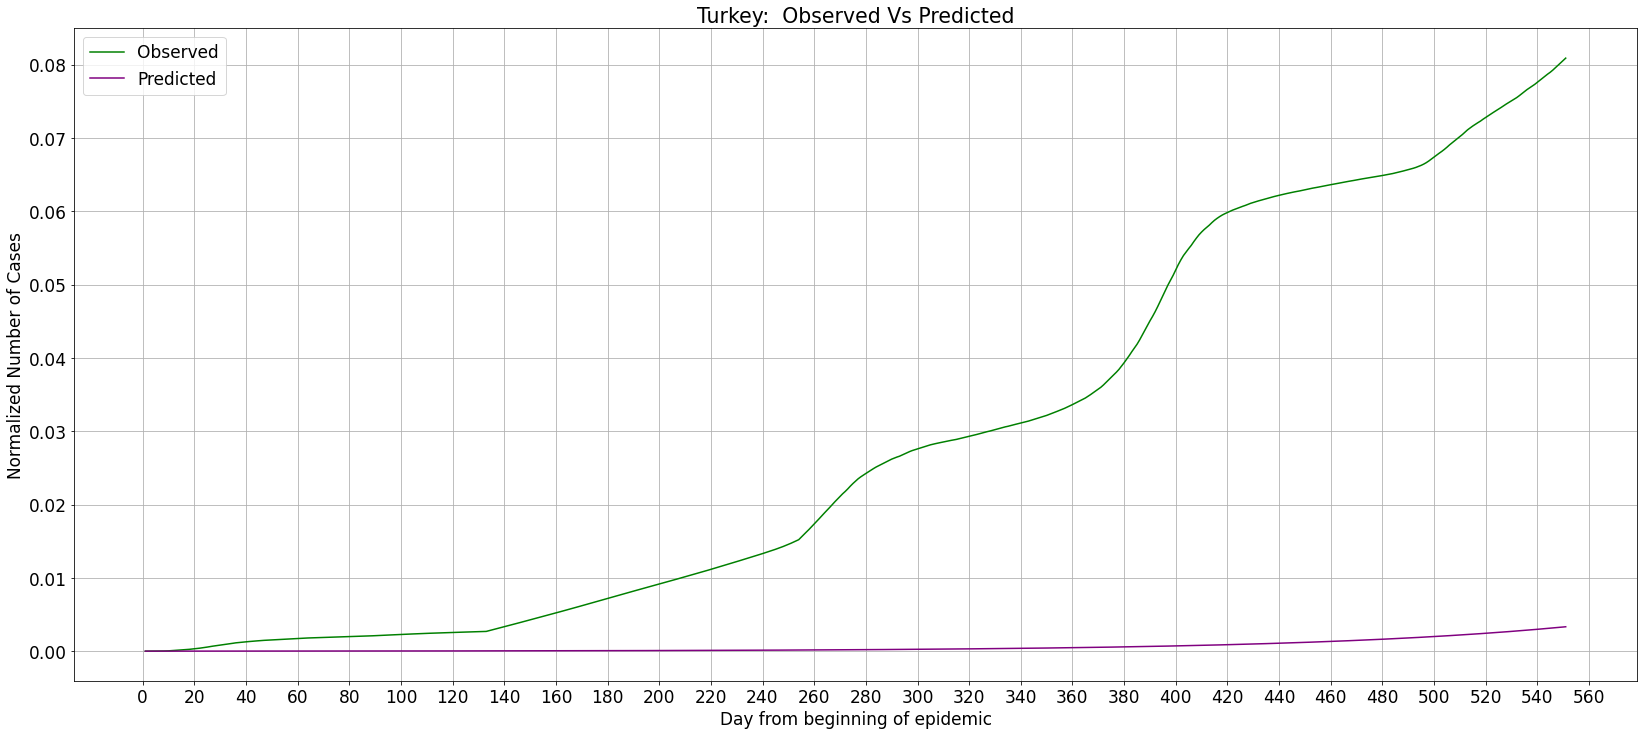

In [1674]:
plt.figure()
plt.plot(x_int4, tur_norm_case[:551], color="green", label = 'Observed')
plt.plot(x_int4, pm4, color="purple", label = 'Predicted')
plt.xticks(np.arange(0,580,20))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Normalized Number of Cases')
plt.title('Turkey:  Observed Vs Predicted')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

# Crowd Effect

In [1675]:
k2 = 1
Ip = 0.02
q1 = k2/Ip
rate = q1 * Sign * Ip**2
print(rate)
print(x_int4)

0.019999976760730377
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 2

In [1676]:
def equat_rate(t, y,a,b,rate,k3,k6):
# y(0) = S_ign(t)
# y(1) = S_res(t)
# y(2) = Sexh(t)
# y(3) = I(t)
# y(4) = R(t)

#S_exh = 1 - sum(y);

    
    #Sexh = 1 -y[0]-y[1] - y[3] - y[4]
        
    dSigndt = -a * y[0] * y[3] - rate + k6 * y[2]
    dSresdt = rate - k3 * y[1]
    dSexhdt = k3 * y[1] - a * y[2] * y[3] -k6 * y[2]
    
    dIdt = a * y[0] * y[3] + a * y[2] * y[3] - b * y[3]
    dRdt = b * y[3]
    
    return [dSigndt, dSresdt,dSexhdt, dIdt, dRdt]
    
inp = tur_norm_case[:551]

In [1677]:
from scipy.integrate import solve_ivp
sol = solve_ivp(equat_rate, [1, inp.shape[0]], [Sign, Sres,Sexh, I3, R3],args = (a4,b,rate,k3,k6), t_eval=x_int4)
#print(sol.y)

In [1678]:
pc4 = sol.y[3] + sol.y[4]

MSE = np.mean(np.square(pc4 - inp))

print(a4,MSE)
print(pc4)
#print(tur_norm_case[:29])

0.1101968156120996 0.0015033455906868372
[1.16196348e-06 1.28933583e-06 1.41519124e-06 1.53928207e-06
 1.66137726e-06 1.78126250e-06 1.89873285e-06 2.01356588e-06
 2.12561886e-06 2.23477469e-06 2.34092895e-06 2.44398988e-06
 2.54387839e-06 2.64052806e-06 2.73388514e-06 2.82390857e-06
 2.91056992e-06 2.99385346e-06 3.07375612e-06 3.15028750e-06
 3.22346987e-06 3.29333817e-06 3.35994001e-06 3.42333567e-06
 3.48355157e-06 3.54052030e-06 3.59437402e-06 3.64525970e-06
 3.69331918e-06 3.73868916e-06 3.78150122e-06 3.82188179e-06
 3.85995221e-06 3.89582866e-06 3.92962222e-06 3.96143881e-06
 3.99137924e-06 4.01953920e-06 4.04600924e-06 4.07087478e-06
 4.09421612e-06 4.11610843e-06 4.13662174e-06 4.15582097e-06
 4.17376591e-06 4.19051122e-06 4.20610641e-06 4.22059589e-06
 4.23401894e-06 4.24640970e-06 4.25779719e-06 4.26820529e-06
 4.27765277e-06 4.28615326e-06 4.29409271e-06 4.30192046e-06
 4.30957585e-06 4.31700093e-06 4.32414251e-06 4.33095212e-06
 4.33738607e-06 4.34340537e-06 4.34897581e-0

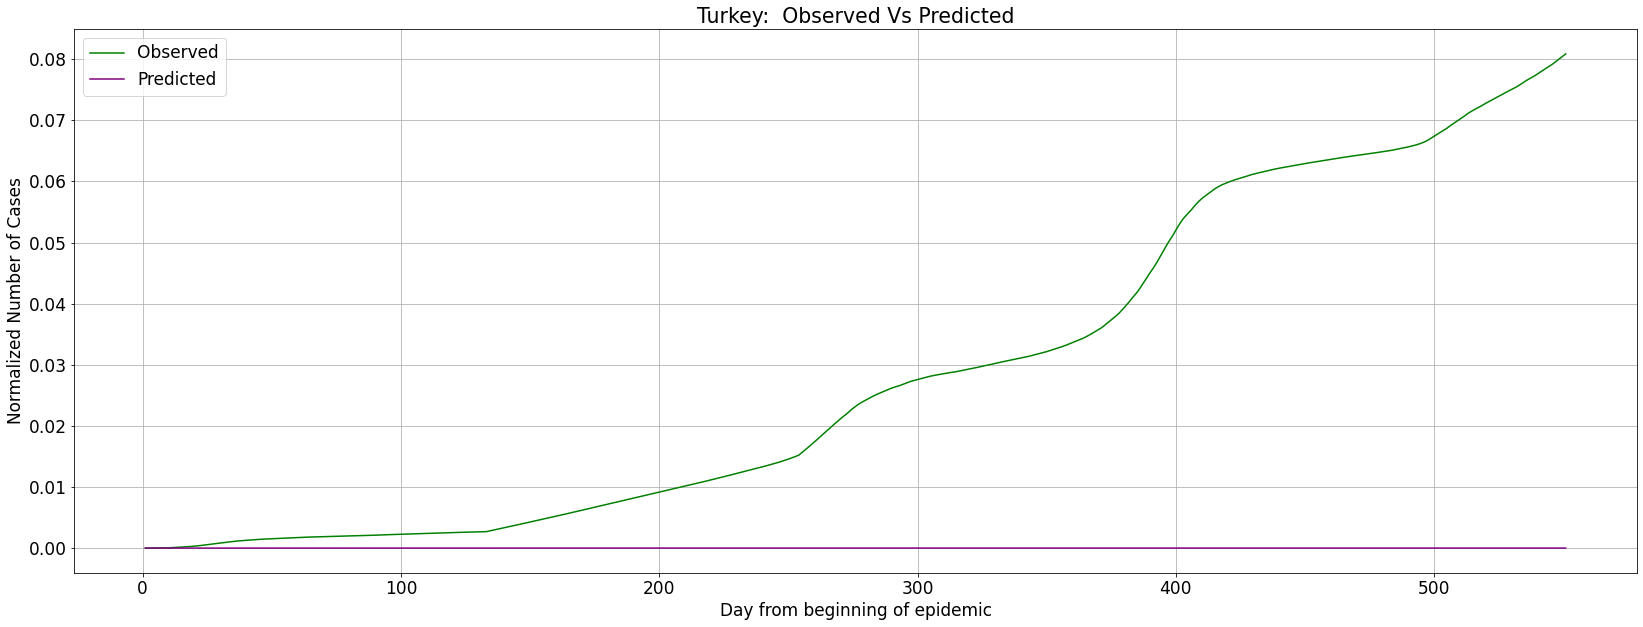

In [1683]:
plt.figure()
plt.plot(x_int4, tur_norm_case[:551], color="green", label = 'Observed')
plt.plot(x_int4, pc4, color="purple", label = 'Predicted')
#plt.xticks(np.arange(0,35,2))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Normalized Number of Cases')
plt.title('Turkey:  Observed Vs Predicted')
plt.rcParams['figure.figsize'] = [28,10]
plt.rcParams.update({'font.size': 17})
plt.legend(loc="upper left")
plt.grid()
plt.show()

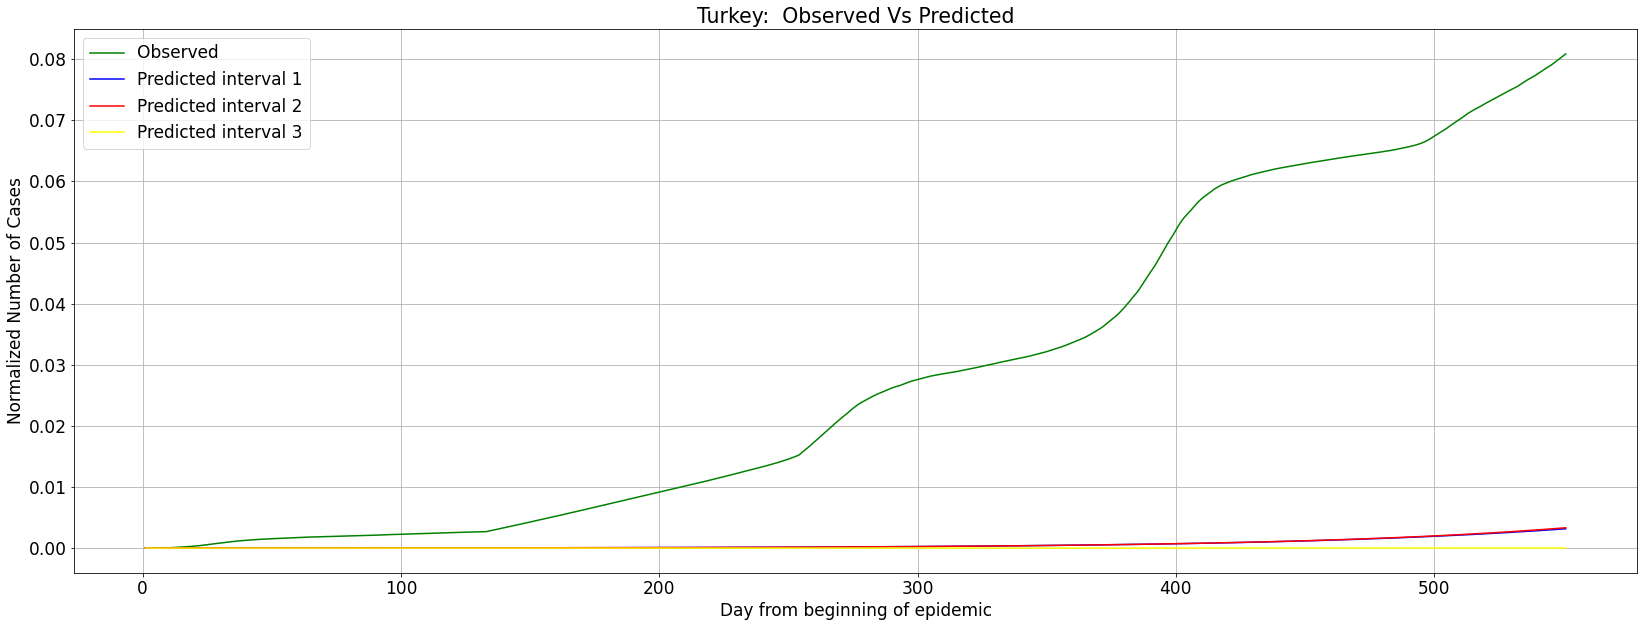

In [1690]:
plt.figure()
plt.plot(x_int4, tur_norm_case[:551], color="green", label = 'Observed')
plt.plot(x_int4, p4, color="blue",  label = 'Predicted interval 1')
plt.plot(x_int4, pm4, color="red", label = 'Predicted interval 2')
plt.plot(x_int4, pc4, color="yellow", label = 'Predicted interval 3')
#plt.plot(x_int4, p4, color="yellow", label = 'Predicted interval 4')
#plt.xticks(np.arange(0,35,2))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Normalized Number of Cases')
plt.title('Turkey:  Observed Vs Predicted')
plt.rcParams['figure.figsize'] = [28,10]
plt.rcParams.update({'font.size': 17})
plt.legend(loc="upper left")
plt.grid()
plt.show()